In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import torch
import pandas as pd
import os
import pickle
from copy import deepcopy


from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from scipy.stats import uniform
from scipy.stats import loguniform


import optuna
optuna.logging.set_verbosity(0) 


import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data_generator as generators
import npm_nnf.utils.utils_train as utils_train

In [3]:
save_path = f'models/density_estimation_1d'

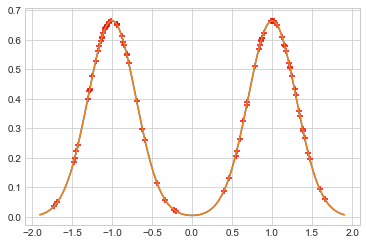

In [4]:
# Number of data points we will be using and basic parameters of the model
ndata = 80

# data generator : gaussian mixture

density_fun = generators.generateGaussianMixture([-1,1],[0.3,0.3],1)[1]

def gen(n=ndata):
    ds,_ = generators.generateGaussianMixture([-1,1],[0.3,0.3],n)
    return ds.view(n,1)

d = 1

base = 'gaussian'
mu_base,eta_base = torch.zeros((d,)),5

data_set = gen()
    
    

# Linear model

In [5]:
version = find_last_version(path = 'models/lin_model_1D',extension = 'pickle')

print(f'last model version number : {version}')

NameError: name 'find_last_version' is not defined

In [5]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'] , 'eta_base' : [eta_base], 'mu_base' : [mu_base]}
X = data_set
model = utils.LinearEstimator()
clf = GridSearchCV(model, parameters)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 465, in fit
    al = self.dModel.prox_method(self.Niter, cb=cb, cobj=cobj)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 952, in prox_method
    Oval,Ograd,Gl_dual = Oms_dual(al2)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 929, in Oms_dual
    x = minus_l(self.lmodel.Rt(alpha))
  File "/Users/ulyssemarteau/Desktop/N

AttributeError: 'LMK2' object has no attribute 'constraint'

{'Niter': 'auto', 'eta_base': 5, 'la': 1e-08, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 1e-08
---iteration: 1---
Finished after 30 iterations
Integral tracker values : 30,0


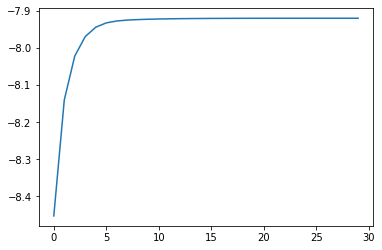

In [12]:
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.LinearEstimator(**params_best)
model.fit(data_set)

integral = tensor([[0.8908]])
integral = tensor([[0.8908]])


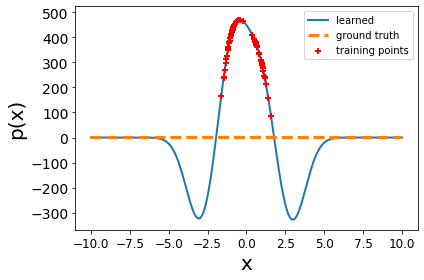

In [13]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# Our model

In [5]:
#Model

In [6]:
model = utils.QuadraticEstimator

In [7]:
#Data set 

In [8]:
X = data_set 

In [9]:
#Last version : 

In [10]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 12


In [12]:
fixed_params = {
        'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base,
            'mu' :1e-3
           }
variable_params = {
    'la' : ['loguniform',1e-3,1e0],
}


cv = 5
prune = False
n_trials =  15


n_jobs = 1
eta = 0



sigma = 1, lambda = 0.056456337640085896, mu = 0.001
Finished after 235 iterations
Integral tracker values : 235,50


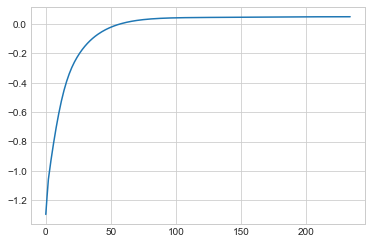

integral = 1.0083102794014116
renorm size 0.2647986530474469
sigma = 1, lambda = 0.056456337640085896, mu = 0.001
Finished after 265 iterations
Integral tracker values : 265,45


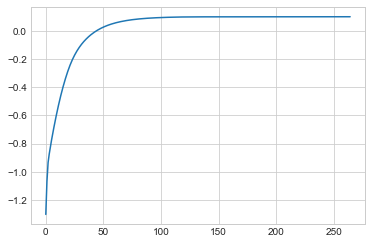

integral = 0.9965588320459324
renorm size 0.26349407239596
sigma = 1, lambda = 0.056456337640085896, mu = 0.001
Finished after 230 iterations
Integral tracker values : 230,39


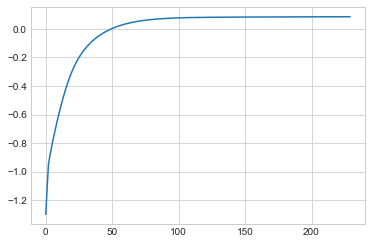

integral = 1.0037726569998613
renorm size 0.26494446234488833
sigma = 1, lambda = 0.056456337640085896, mu = 0.001
Finished after 309 iterations
Integral tracker values : 309,52


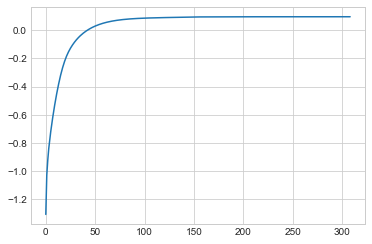

integral = 0.9959381975292212
renorm size 0.26191047649478644
sigma = 1, lambda = 0.056456337640085896, mu = 0.001
Finished after 266 iterations
Integral tracker values : 266,45


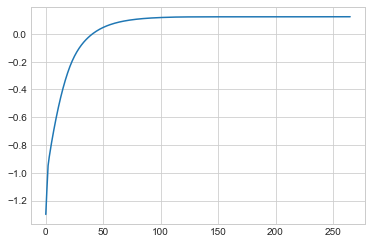

integral = 0.996889726989568
renorm size 0.26438579858334793
sigma = 1, lambda = 0.021526701953226594, mu = 0.001
Finished after 255 iterations
Integral tracker values : 255,43


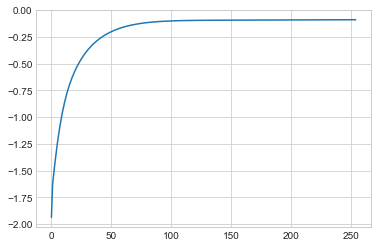

integral = 1.0064965900545078
renorm size 0.2647986530474469
sigma = 1, lambda = 0.021526701953226594, mu = 0.001
Finished after 247 iterations
Integral tracker values : 247,42


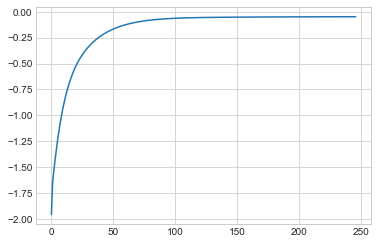

integral = 1.00536321234216
renorm size 0.26349407239596
sigma = 1, lambda = 0.021526701953226594, mu = 0.001
Finished after 251 iterations
Integral tracker values : 251,42


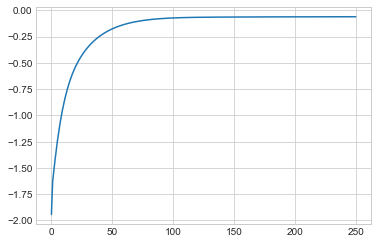

integral = 1.0045291327347166
renorm size 0.26494446234488833
sigma = 1, lambda = 0.021526701953226594, mu = 0.001
Finished after 300 iterations
Integral tracker values : 300,86


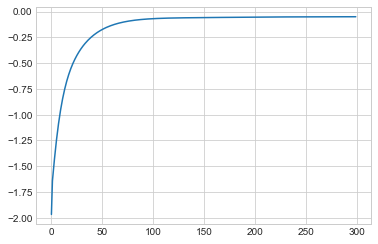

integral = 1.0086253632388678
renorm size 0.26191047649478644
sigma = 1, lambda = 0.021526701953226594, mu = 0.001
Finished after 251 iterations
Integral tracker values : 251,42


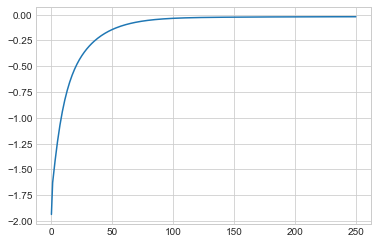

integral = 1.0042432983575271
renorm size 0.26438579858334793
sigma = 1, lambda = 0.003093992478295444, mu = 0.001
Finished after 215 iterations
Integral tracker values : 215,42


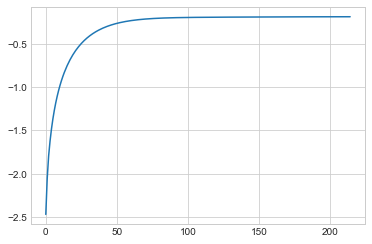

integral = 1.006033220105248
renorm size 0.2647986530474469
sigma = 1, lambda = 0.003093992478295444, mu = 0.001
Finished after 199 iterations
Integral tracker values : 199,34


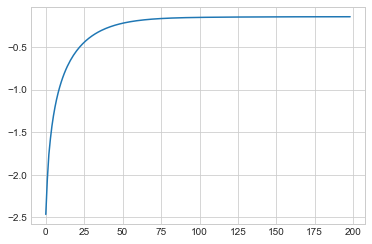

integral = 1.0048806077592964
renorm size 0.26349407239596
sigma = 1, lambda = 0.003093992478295444, mu = 0.001
Finished after 209 iterations
Integral tracker values : 209,35


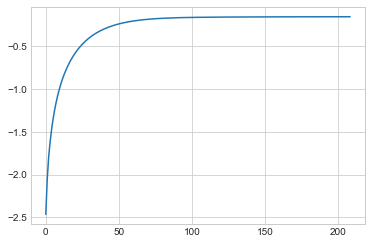

integral = 1.0039505904091643
renorm size 0.26494446234488833
sigma = 1, lambda = 0.003093992478295444, mu = 0.001
Finished after 230 iterations
Integral tracker values : 230,59


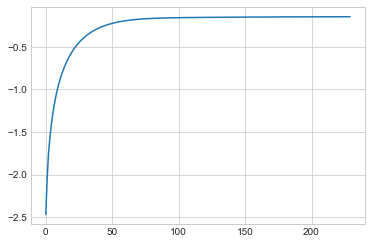

integral = 1.0084511389306796
renorm size 0.26191047649478644
sigma = 1, lambda = 0.003093992478295444, mu = 0.001
Finished after 212 iterations
Integral tracker values : 212,36


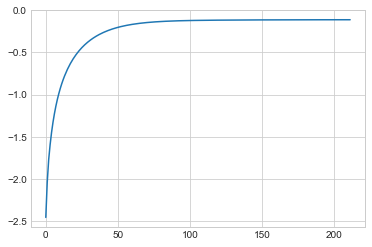

integral = 1.0035848462418737
renorm size 0.26438579858334793
sigma = 1, lambda = 0.47438042251490664, mu = 0.001
Finished after 151 iterations
Integral tracker values : 151,26


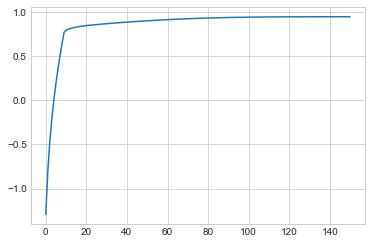

integral = 0.9911376620988996
renorm size 0.2647986530474469
sigma = 1, lambda = 0.47438042251490664, mu = 0.001
Finished after 152 iterations
Integral tracker values : 152,26


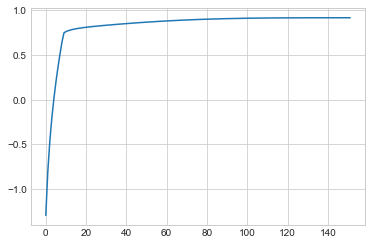

integral = 0.9913188751812971
renorm size 0.26349407239596
sigma = 1, lambda = 0.47438042251490664, mu = 0.001
Finished after 152 iterations
Integral tracker values : 152,26


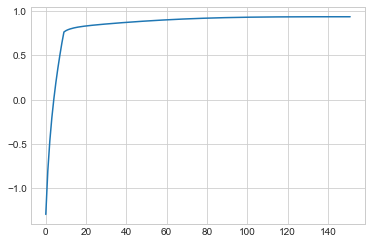

integral = 0.9919104193161996
renorm size 0.26494446234488833
sigma = 1, lambda = 0.47438042251490664, mu = 0.001
Finished after 161 iterations
Integral tracker values : 161,27


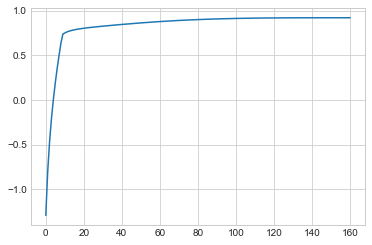

integral = 0.990500398902372
renorm size 0.26191047649478644
sigma = 1, lambda = 0.47438042251490664, mu = 0.001
Finished after 155 iterations
Integral tracker values : 155,28


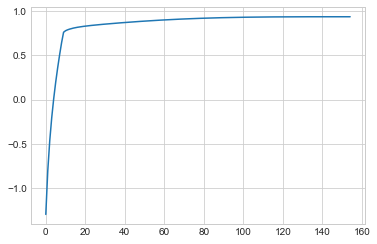

integral = 0.9910685727572301
renorm size 0.26438579858334793
sigma = 1, lambda = 0.02986540439428064, mu = 0.001
Finished after 256 iterations
Integral tracker values : 256,43


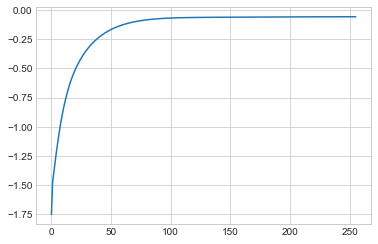

integral = 1.0064977259562826
renorm size 0.2647986530474469
sigma = 1, lambda = 0.02986540439428064, mu = 0.001
Finished after 247 iterations
Integral tracker values : 247,42


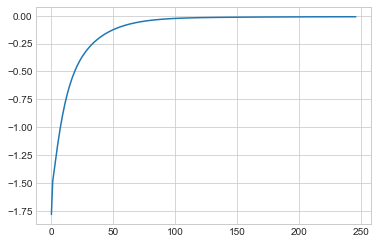

integral = 1.0051793360335786
renorm size 0.26349407239596
sigma = 1, lambda = 0.02986540439428064, mu = 0.001
Finished after 253 iterations
Integral tracker values : 253,43


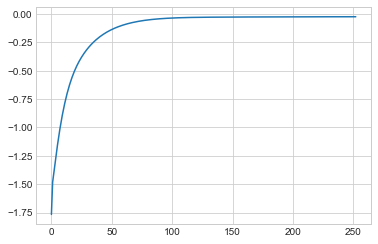

integral = 1.0046997039998231
renorm size 0.26494446234488833
sigma = 1, lambda = 0.02986540439428064, mu = 0.001
Finished after 315 iterations
Integral tracker values : 315,101


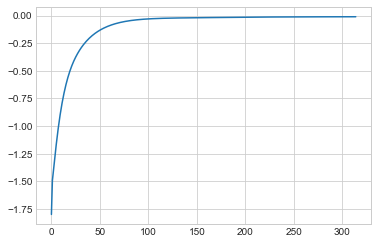

integral = 1.0071614996377665
renorm size 0.26191047649478644
sigma = 1, lambda = 0.02986540439428064, mu = 0.001
Finished after 251 iterations
Integral tracker values : 251,42


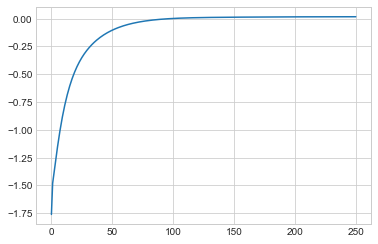

integral = 1.004157848898491
renorm size 0.26438579858334793
sigma = 1, lambda = 0.021313238778817325, mu = 0.001
Finished after 255 iterations
Integral tracker values : 255,43


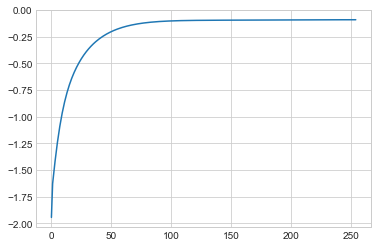

integral = 1.0065035545237884
renorm size 0.2647986530474469
sigma = 1, lambda = 0.021313238778817325, mu = 0.001
Finished after 247 iterations
Integral tracker values : 247,42


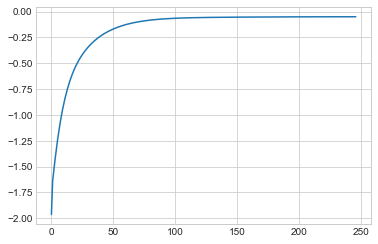

integral = 1.0053674980820648
renorm size 0.26349407239596
sigma = 1, lambda = 0.021313238778817325, mu = 0.001
Finished after 251 iterations
Integral tracker values : 251,42


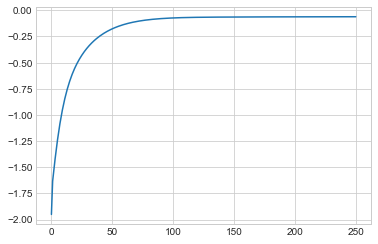

integral = 1.0045356208159422
renorm size 0.26494446234488833
sigma = 1, lambda = 0.021313238778817325, mu = 0.001
Finished after 300 iterations
Integral tracker values : 300,86


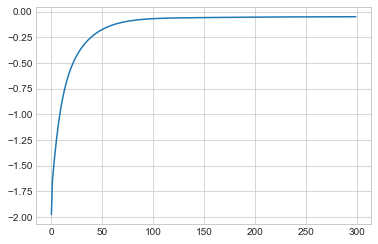

integral = 1.0086210768220396
renorm size 0.26191047649478644
sigma = 1, lambda = 0.021313238778817325, mu = 0.001
Finished after 251 iterations
Integral tracker values : 251,42


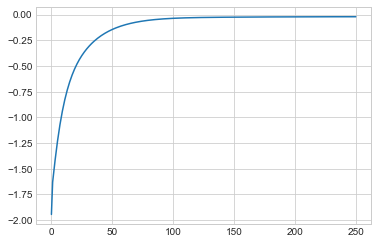

integral = 1.004245223971853
renorm size 0.26438579858334793
sigma = 1, lambda = 0.008624822251057198, mu = 0.001
Finished after 225 iterations
Integral tracker values : 225,38


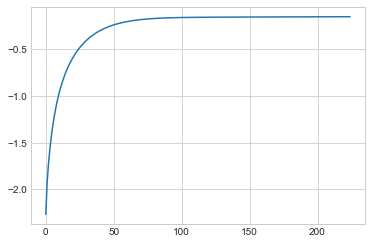

integral = 1.0059289682101156
renorm size 0.2647986530474469
sigma = 1, lambda = 0.008624822251057198, mu = 0.001
Finished after 224 iterations
Integral tracker values : 224,38


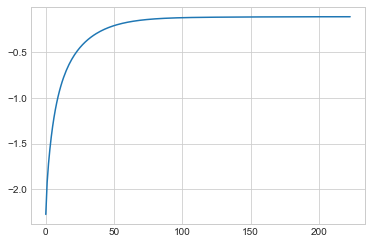

integral = 1.0054939676549197
renorm size 0.26349407239596
sigma = 1, lambda = 0.008624822251057198, mu = 0.001
Finished after 226 iterations
Integral tracker values : 226,38


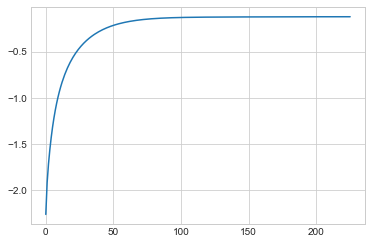

integral = 1.0045933770804265
renorm size 0.26494446234488833
sigma = 1, lambda = 0.008624822251057198, mu = 0.001
Finished after 255 iterations
Integral tracker values : 255,62


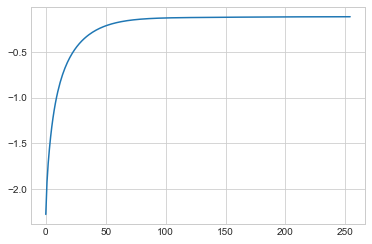

integral = 1.0090168067996064
renorm size 0.26191047649478644
sigma = 1, lambda = 0.008624822251057198, mu = 0.001
Finished after 227 iterations
Integral tracker values : 227,38


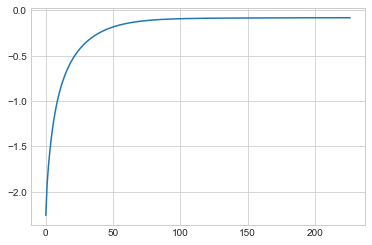

integral = 1.0041377057139054
renorm size 0.26438579858334793
sigma = 1, lambda = 0.11846435482565498, mu = 0.001
Finished after 325 iterations
Integral tracker values : 325,55


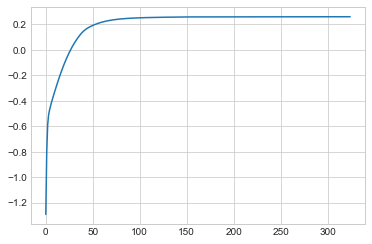

integral = 0.9947851941751695
renorm size 0.2647986530474469
sigma = 1, lambda = 0.11846435482565498, mu = 0.001
Finished after 242 iterations
Integral tracker values : 242,41


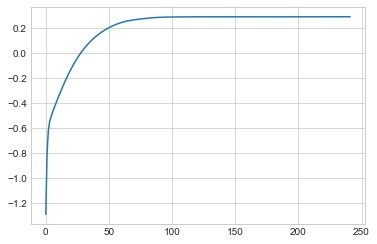

integral = 0.9978147352882747
renorm size 0.26349407239596
sigma = 1, lambda = 0.11846435482565498, mu = 0.001
Finished after 243 iterations
Integral tracker values : 243,41


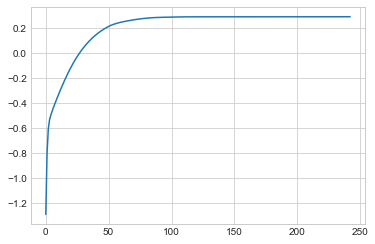

integral = 0.9949568794711314
renorm size 0.26494446234488833
sigma = 1, lambda = 0.11846435482565498, mu = 0.001
Finished after 254 iterations
Integral tracker values : 254,43


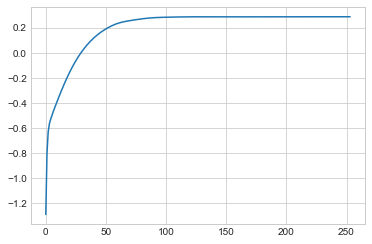

integral = 0.9945134170364837
renorm size 0.26191047649478644
sigma = 1, lambda = 0.11846435482565498, mu = 0.001
Finished after 245 iterations
Integral tracker values : 245,41


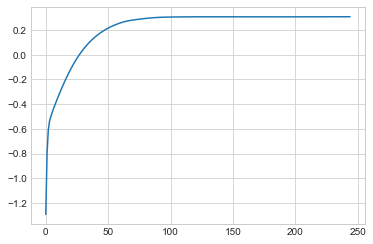

integral = 0.997553966064282
renorm size 0.26438579858334793
sigma = 1, lambda = 0.0010702823274978943, mu = 0.001
Finished after 215 iterations
Integral tracker values : 215,44


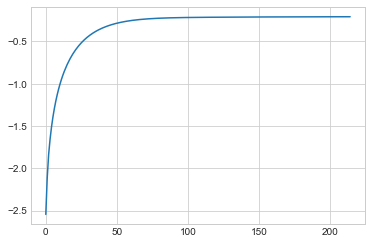

integral = 1.005888972927384
renorm size 0.2647986530474469
sigma = 1, lambda = 0.0010702823274978943, mu = 0.001
Finished after 207 iterations
Integral tracker values : 207,35


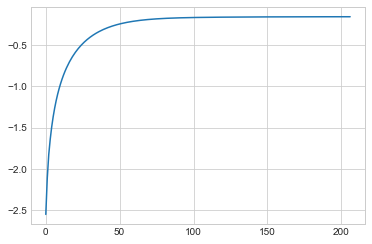

integral = 1.0047509987604397
renorm size 0.26349407239596
sigma = 1, lambda = 0.0010702823274978943, mu = 0.001
Finished after 207 iterations
Integral tracker values : 207,35


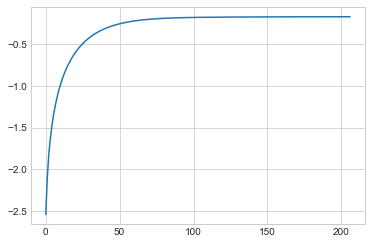

integral = 1.0038128067939833
renorm size 0.26494446234488833
sigma = 1, lambda = 0.0010702823274978943, mu = 0.001
Finished after 240 iterations
Integral tracker values : 240,62


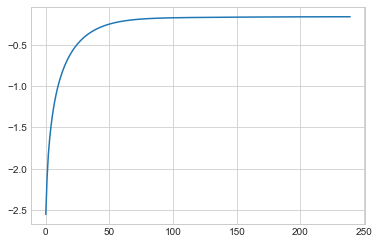

integral = 1.0082265251283102
renorm size 0.26191047649478644
sigma = 1, lambda = 0.0010702823274978943, mu = 0.001
Finished after 209 iterations
Integral tracker values : 209,35


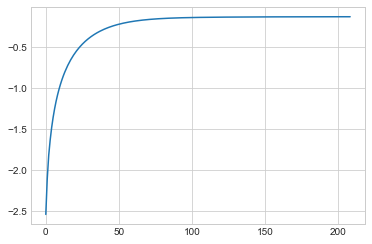

integral = 1.0030663639096156
renorm size 0.26438579858334793
sigma = 1, lambda = 0.4036443087686588, mu = 0.001
Finished after 277 iterations
Integral tracker values : 277,47


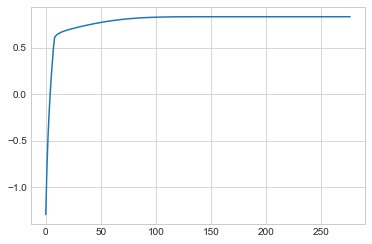

integral = 1.0041617423532079
renorm size 0.2647986530474469
sigma = 1, lambda = 0.4036443087686588, mu = 0.001
Finished after 279 iterations
Integral tracker values : 279,47


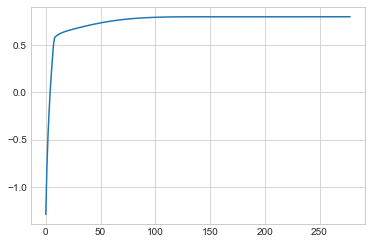

integral = 1.0038264264848091
renorm size 0.26349407239596
sigma = 1, lambda = 0.4036443087686588, mu = 0.001
Finished after 279 iterations
Integral tracker values : 279,47


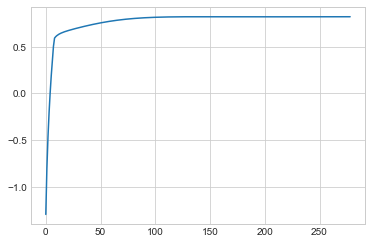

integral = 1.0037416667598527
renorm size 0.26494446234488833
sigma = 1, lambda = 0.4036443087686588, mu = 0.001
Finished after 297 iterations
Integral tracker values : 297,50


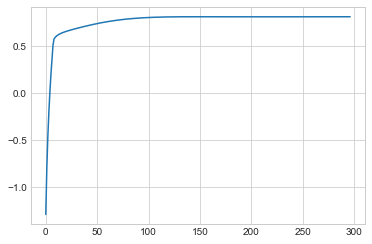

integral = 1.0040326478078492
renorm size 0.26191047649478644
sigma = 1, lambda = 0.4036443087686588, mu = 0.001
Finished after 280 iterations
Integral tracker values : 280,47


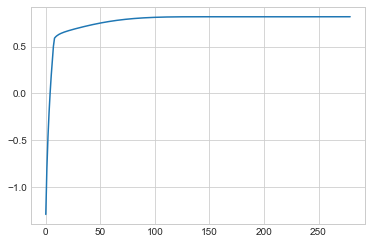

integral = 1.0032624209397176
renorm size 0.26438579858334793
sigma = 1, lambda = 0.0010322932371315775, mu = 0.001
Finished after 215 iterations
Integral tracker values : 215,44


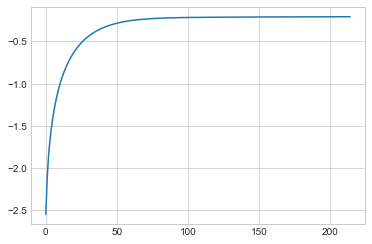

integral = 1.005885663163991
renorm size 0.2647986530474469
sigma = 1, lambda = 0.0010322932371315775, mu = 0.001
Finished after 207 iterations
Integral tracker values : 207,35


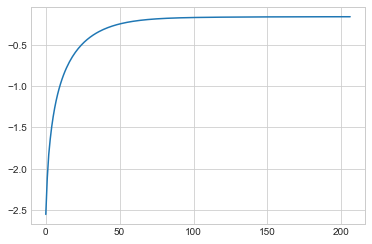

integral = 1.0047552994464397
renorm size 0.26349407239596
sigma = 1, lambda = 0.0010322932371315775, mu = 0.001
Finished after 207 iterations
Integral tracker values : 207,35


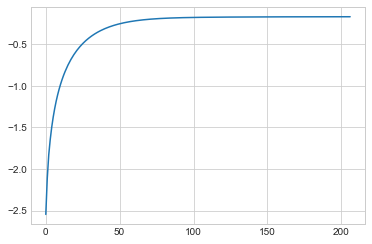

integral = 1.003818950284813
renorm size 0.26494446234488833
sigma = 1, lambda = 0.0010322932371315775, mu = 0.001
Finished after 240 iterations
Integral tracker values : 240,62


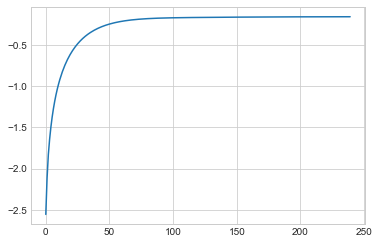

integral = 1.008220370256504
renorm size 0.26191047649478644
sigma = 1, lambda = 0.0010322932371315775, mu = 0.001
Finished after 209 iterations
Integral tracker values : 209,35


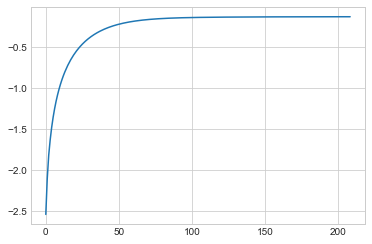

integral = 1.0030687684725803
renorm size 0.26438579858334793
sigma = 1, lambda = 0.0012341778381142238, mu = 0.001
Finished after 210 iterations
Integral tracker values : 210,47


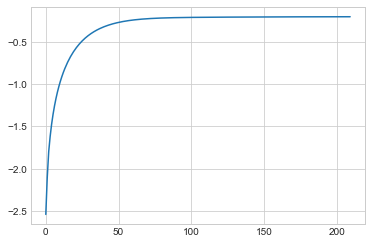

integral = 1.0063116316405678
renorm size 0.2647986530474469
sigma = 1, lambda = 0.0012341778381142238, mu = 0.001
Finished after 197 iterations
Integral tracker values : 197,33


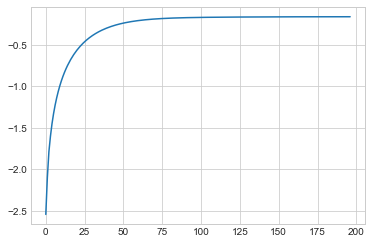

integral = 1.0046260641315137
renorm size 0.26349407239596
sigma = 1, lambda = 0.0012341778381142238, mu = 0.001
Finished after 197 iterations
Integral tracker values : 197,33


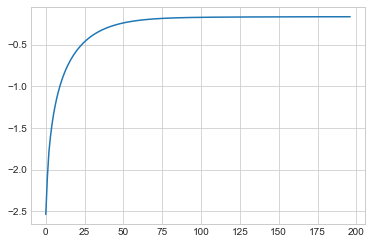

integral = 1.0036846945008693
renorm size 0.26494446234488833
sigma = 1, lambda = 0.0012341778381142238, mu = 0.001
Finished after 240 iterations
Integral tracker values : 240,62


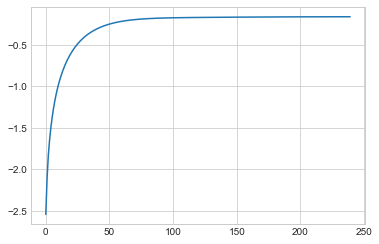

integral = 1.0082526568180437
renorm size 0.26191047649478644
sigma = 1, lambda = 0.0012341778381142238, mu = 0.001
Finished after 200 iterations
Integral tracker values : 200,34


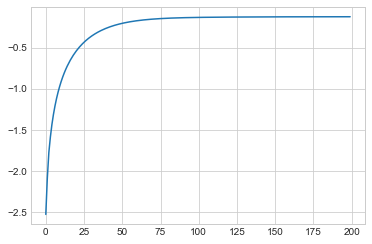

integral = 1.0032231379189023
renorm size 0.26438579858334793
sigma = 1, lambda = 0.0010891661157129387, mu = 0.001
Finished after 215 iterations
Integral tracker values : 215,44


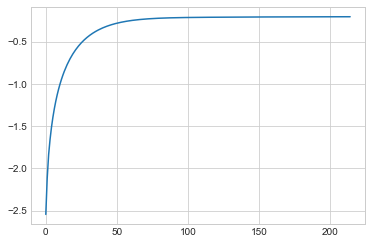

integral = 1.005890609520315
renorm size 0.2647986530474469
sigma = 1, lambda = 0.0010891661157129387, mu = 0.001
Finished after 207 iterations
Integral tracker values : 207,35


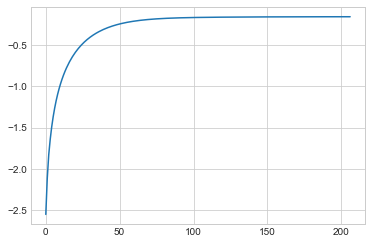

integral = 1.004748846062203
renorm size 0.26349407239596
sigma = 1, lambda = 0.0010891661157129387, mu = 0.001
Finished after 207 iterations
Integral tracker values : 207,35


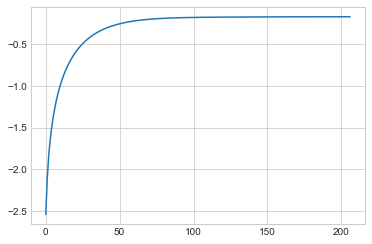

integral = 1.0038097463778293
renorm size 0.26494446234488833
sigma = 1, lambda = 0.0010891661157129387, mu = 0.001
Finished after 240 iterations
Integral tracker values : 240,62


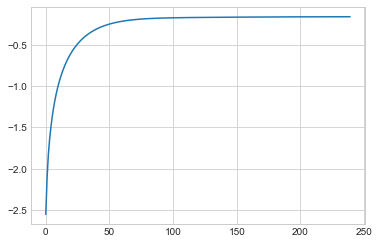

integral = 1.0082295707281481
renorm size 0.26191047649478644
sigma = 1, lambda = 0.0010891661157129387, mu = 0.001
Finished after 200 iterations
Integral tracker values : 200,34


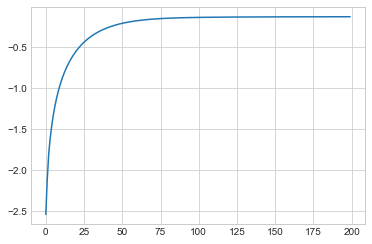

integral = 1.0032314685488626
renorm size 0.26438579858334793
sigma = 1, lambda = 0.0033424758005168643, mu = 0.001
Finished after 215 iterations
Integral tracker values : 215,42


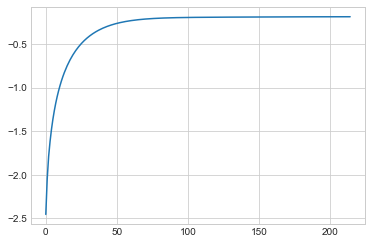

integral = 1.006045216745902
renorm size 0.2647986530474469
sigma = 1, lambda = 0.0033424758005168643, mu = 0.001
Finished after 209 iterations
Integral tracker values : 209,35


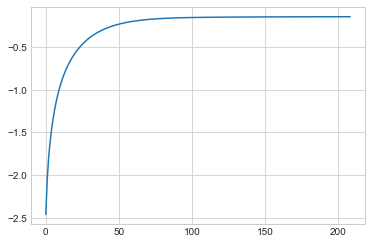

integral = 1.0049262989876073
renorm size 0.26349407239596
sigma = 1, lambda = 0.0033424758005168643, mu = 0.001
Finished after 209 iterations
Integral tracker values : 209,35


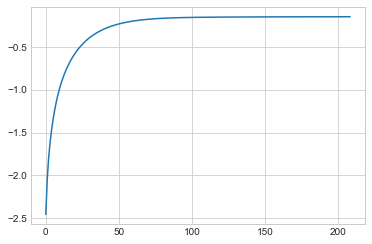

integral = 1.0039083286394983
renorm size 0.26494446234488833
sigma = 1, lambda = 0.0033424758005168643, mu = 0.001
Finished after 240 iterations
Integral tracker values : 240,60


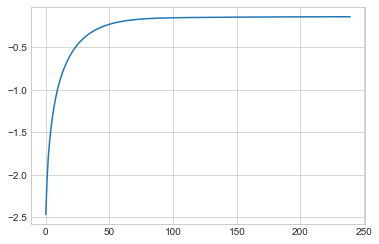

integral = 1.00853194885986
renorm size 0.26191047649478644
sigma = 1, lambda = 0.0033424758005168643, mu = 0.001
Finished after 212 iterations
Integral tracker values : 212,36


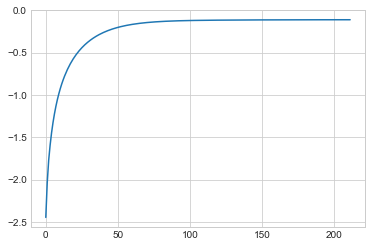

integral = 1.0035576325206406
renorm size 0.26438579858334793
sigma = 1, lambda = 0.0028207001290438184, mu = 0.001
Finished after 205 iterations
Integral tracker values : 205,41


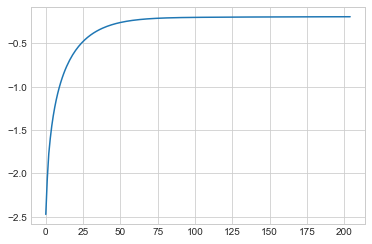

integral = 1.005991757324811
renorm size 0.2647986530474469
sigma = 1, lambda = 0.0028207001290438184, mu = 0.001
Finished after 199 iterations
Integral tracker values : 199,34


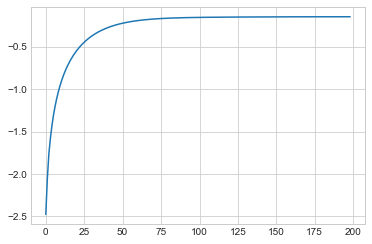

integral = 1.0049213877023813
renorm size 0.26349407239596
sigma = 1, lambda = 0.0028207001290438184, mu = 0.001
Finished after 200 iterations
Integral tracker values : 200,34


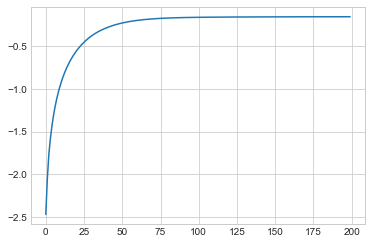

integral = 1.0041540771325241
renorm size 0.26494446234488833
sigma = 1, lambda = 0.0028207001290438184, mu = 0.001
Finished after 240 iterations
Integral tracker values : 240,60


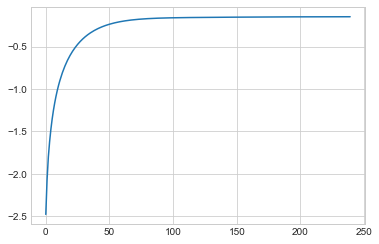

integral = 1.0084726703094138
renorm size 0.26191047649478644
sigma = 1, lambda = 0.0028207001290438184, mu = 0.001
Finished after 201 iterations
Integral tracker values : 201,34


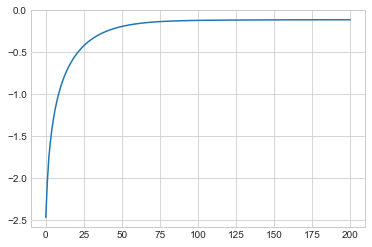

integral = 1.0033334615095126
renorm size 0.26438579858334793



In [13]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path,version = None,eta = 0,n_jobs = 1)

In [14]:
version = None
df,best_params,aux = utils_train.get_results(save_path,model = model,version = version)
display(df)

number     value             datetime_start          datetime_complete  \
0        0  1.146754 2020-10-19 10:55:07.729518 2020-10-19 10:55:11.596036   
1        1  1.095050 2020-10-19 10:55:11.597499 2020-10-19 10:55:15.480575   
2        2  1.093188 2020-10-19 10:55:15.481864 2020-10-19 10:55:18.685857   
3        3  1.428610 2020-10-19 10:55:18.687220 2020-10-19 10:55:21.126102   
4        4  1.099120 2020-10-19 10:55:21.127428 2020-10-19 10:55:24.863263   
5        5  1.094957 2020-10-19 10:55:24.864576 2020-10-19 10:55:28.644613   
6        6  1.093542 2020-10-19 10:55:28.646424 2020-10-19 10:55:32.110619   
7        7  1.253195 2020-10-19 10:55:32.112105 2020-10-19 10:55:35.917550   
8        8  1.091189 2020-10-19 10:55:35.919004 2020-10-19 10:55:39.057036   
9        9  1.406913 2020-10-19 10:55:39.058519 2020-10-19 10:55:43.086807   
10      10  1.091147 2020-10-19 10:55:43.088021 2020-10-19 10:55:46.341593   
11      11  1.091277 2020-10-19 10:55:46.343084 2020-10-19 10:55:49.477535   
12      12  1.091188 2020-10-19 10:55:49.479029 2020-10-19 10:55:52.611111   
13      13  1.093448 2020-10-19 10:55:52.612434 2020-10-19 10:55:55.812674   
14      14  1.092895 2020-10-19 10:55:55.814170 2020-10-19 10:55:58.975572   

          duration  params_la  user_attrs_accuracy  \
0  00:00:03.866518   0.056456             1.146754   
1  00:00:03.883076   0.021527             1.095050   
2  00:00:03.203993   0.003094             1.093188   
3  00:00:02.438882   0.474380             1.428610   
4  00:00:03.735835   0.029865             1.099120   
5  00:00:03.780037   0.021313             1.094957   
6  00:00:03.464195   0.008625             1.093542   
7  00:00:03.805445   0.118464             1.253195   
8  00:00:03.138032   0.001070             1.091189   
9  00:00:04.028288   0.403644             1.406913   
10 00:00:03.253572   0.001032             1.091147   
11 00:00:03.134451   0.001234             1.091277   
12 00:00:03.132082   0.001089             1.091188   
13 00:00:03.200240   0.003342             1.093448   
14 00:00:03.161402   0.002821             1.092895   

                                    user_attrs_scores  user_attrs_std  \
0   [1.2877782578868842, 1.1152384247238132, 1.135...        0.089590   
1   [1.2366940027802822, 1.072902473579868, 1.1015...        0.095352   
2   [1.2546430095324421, 1.0860346705063406, 1.081...        0.105779   
3   [1.3410819568635874, 1.4905026151523342, 1.399...        0.058671   
4   [1.248864995768036, 1.0676774914009453, 1.1092...        0.098137   
5   [1.236390358279426, 1.073063615135408, 1.10132...        0.095286   
6   [1.234418355202507, 1.0854864603775949, 1.0891...        0.096481   
7   [1.3437757546002902, 1.2465100334060542, 1.216...        0.060832   
8   [1.2632487558447647, 1.0828130269216598, 1.077...        0.111042   
9   [1.324970585860625, 1.4655813189626166, 1.3793...        0.056091   
10  [1.263420933360193, 1.0827492589992358, 1.0771...        0.111150   
11  [1.2619691097492116, 1.0831695207694474, 1.077...        0.110441   
12  [1.2631633408738159, 1.0828447742629155, 1.077...        0.111022   
13  [1.2536499403271222, 1.086404350794608, 1.0818...        0.105160   
14  [1.25577510657896, 1.0855541456529427, 1.08053...        0.106427   

       state  
0   COMPLETE  
1   COMPLETE  
2   COMPLETE  
3   COMPLETE  
4   COMPLETE  
5   COMPLETE  
6   COMPLETE  
7   COMPLETE  
8   COMPLETE  
9   COMPLETE  
10  COMPLETE  
11  COMPLETE  
12  COMPLETE  
13  COMPLETE  
14  COMPLETE

In [15]:
eta = 1
params = aux(0)
print(params)

{'la': 0.0010322932371315775, 'sigma': 1, 'Niter': 'auto', 'mu_base': tensor([0.]), 'eta_base': 5, 'mu': 0.001}


In [17]:
params['la'] = 0.5
params['mu'] = 0.01

sigma = 1, lambda = 0.0010322932371315775, mu = 0.001
Finished after 208 iterations
Integral tracker values : 208,35


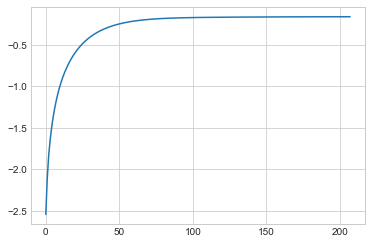

In [16]:
clf = model(**params)
clf.fit(X)

integral = 1.0043756354772195
renorm size 0.26481554604393726
tensor(1.0037)
integral = 1.0043756354772195
renorm size 0.26481554604393726


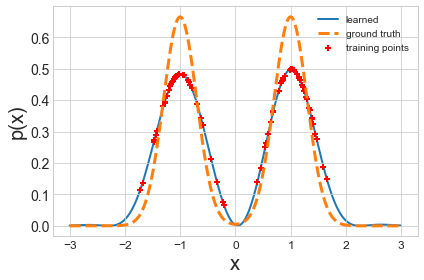

In [19]:
c,r,ntest = 0,3,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = clf.predict(xtest)
print(ytest.sum()*2*r/ntest)
ydata_set =clf.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

In [6]:
version = find_last_version(path = 'models/our_model_1D',extension = 'pickle')

print(f'last version number : {version}')

last version number : 1


sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 8422 iterations
Integral tracker values : 8422,1404


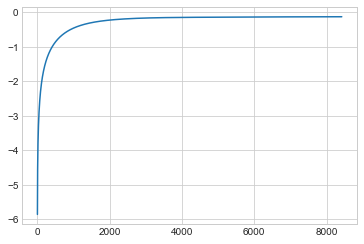

integral = 1.0057310227075624
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 9745 iterations
Integral tracker values : 9745,1873


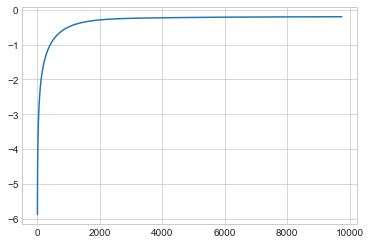

integral = 0.9984456085458848
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 8145 iterations
Integral tracker values : 8145,1358


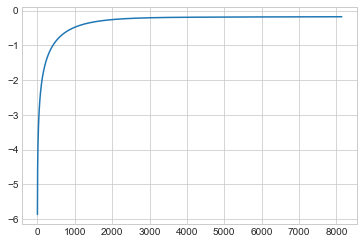

integral = 1.0031410257247109
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 6091 iterations
Integral tracker values : 6091,1016


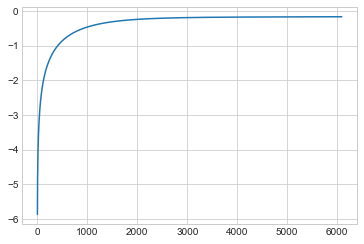

integral = 0.9940129735894877
sigma = 1, lambda = 0.0001, mu = 1e-06
Finished after 6080 iterations
Integral tracker values : 6080,1094


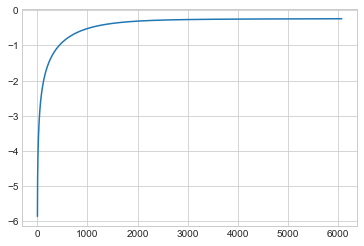

integral = 0.9992157975495173
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1970 iterations
Integral tracker values : 1970,1298


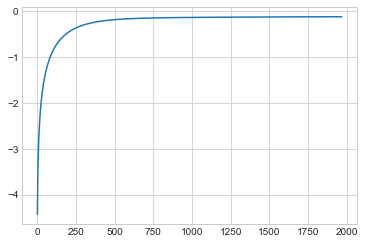

integral = 1.005519077230588
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Integral tracker values : 2253,620


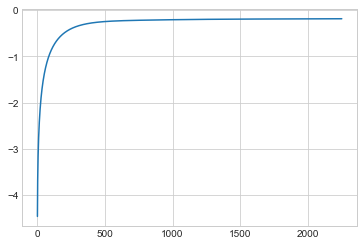

integral = 0.9943351278535184
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1580 iterations
Integral tracker values : 1580,636


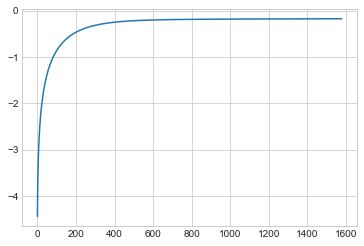

integral = 0.9973681745307139
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1810 iterations
Integral tracker values : 1810,749


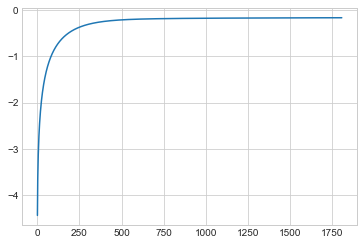

integral = 0.9988669894040998
sigma = 1, lambda = 0.0001, mu = 2.1544346900318823e-05
Finished after 1277 iterations
Integral tracker values : 1277,213


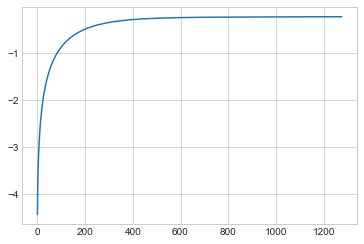

integral = 0.9989256081283993
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 495 iterations
Integral tracker values : 495,262


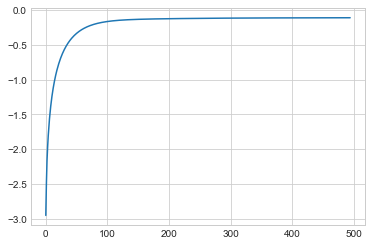

integral = 1.004808344678149
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Integral tracker values : 563,213


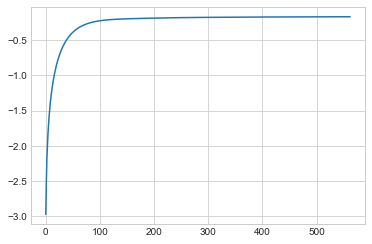

integral = 1.0011869097150696
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 370 iterations
Integral tracker values : 370,132


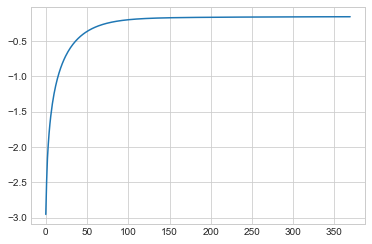

integral = 1.001501567372625
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 465 iterations
Integral tracker values : 465,222


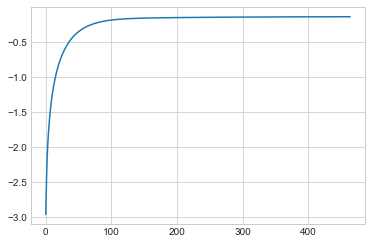

integral = 1.0004780209237292
sigma = 1, lambda = 0.0001, mu = 0.00046415888336127773
Finished after 310 iterations
Integral tracker values : 310,64


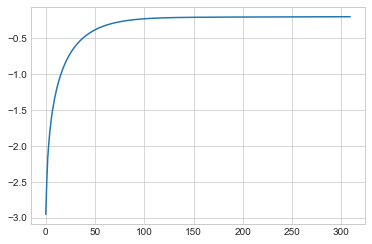

integral = 1.0041531002266746
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,27


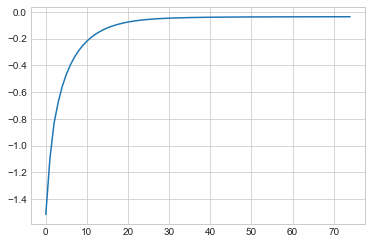

integral = 0.9995839537995799
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 80 iterations
Integral tracker values : 80,29


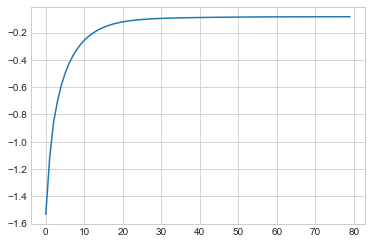

integral = 1.0030962346731551
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,24


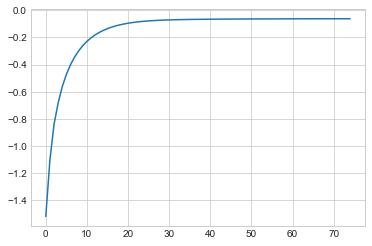

integral = 1.0014961167055279
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,20


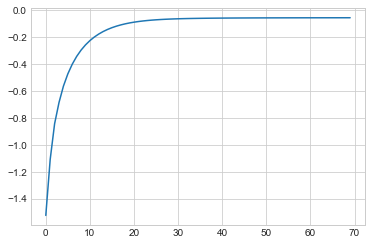

integral = 1.0006344574552066
sigma = 1, lambda = 0.0001, mu = 0.01
Finished after 80 iterations
Integral tracker values : 80,24


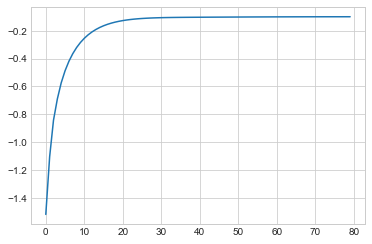

integral = 1.004769255179105
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 7400 iterations
Integral tracker values : 7400,1779


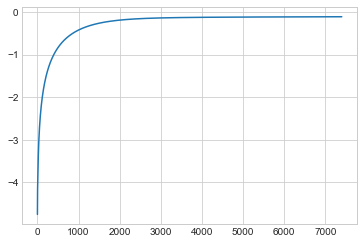

integral = 0.9994167527078441
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Integral tracker values : 10099,1548


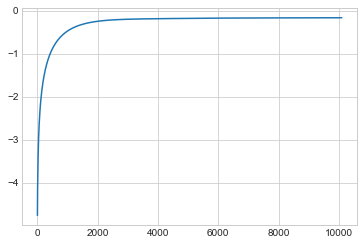

integral = 0.998303955235605
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 6925 iterations
Integral tracker values : 6925,1155


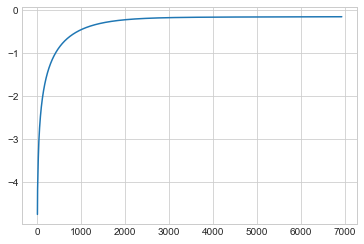

integral = 0.9997217441485116
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 7042 iterations
Integral tracker values : 7042,1174


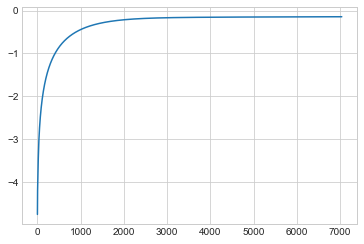

integral = 1.0032455468638846
sigma = 1, lambda = 0.002154434690031882, mu = 1e-06
Finished after 7097 iterations
Integral tracker values : 7097,1183


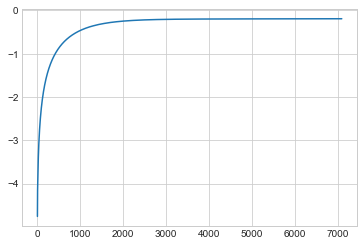

integral = 1.0027328052201394
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1910 iterations
Integral tracker values : 1910,674


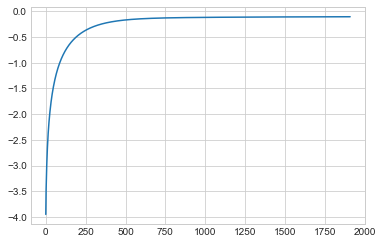

integral = 1.0012056609244997
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Integral tracker values : 2253,343


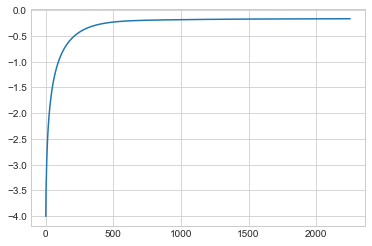

integral = 0.9995475504060325
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1565 iterations
Integral tracker values : 1565,263


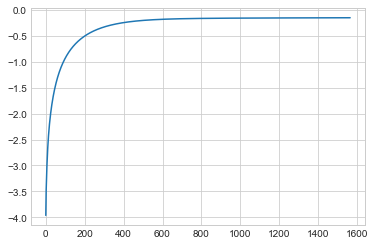

integral = 0.9997720675691706
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1900 iterations
Integral tracker values : 1900,575


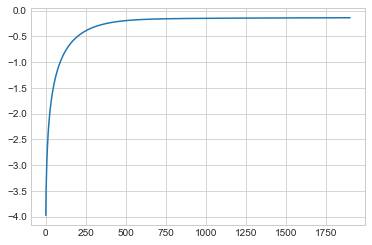

integral = 1.0039823825466767
sigma = 1, lambda = 0.002154434690031882, mu = 2.1544346900318823e-05
Finished after 1574 iterations
Integral tracker values : 1574,263


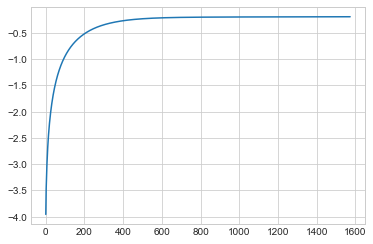

integral = 1.0013028586377652
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 495 iterations
Integral tracker values : 495,245


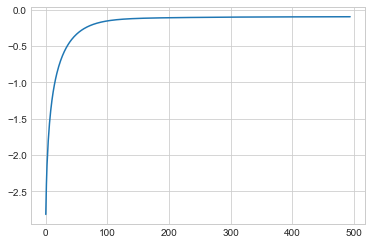

integral = 1.003807019569267
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Integral tracker values : 563,195


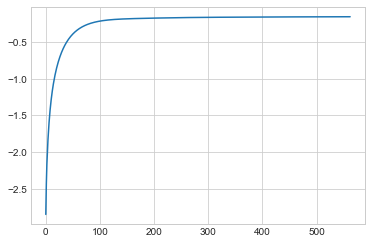

integral = 0.9983148178337925
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 385 iterations
Integral tracker values : 385,131


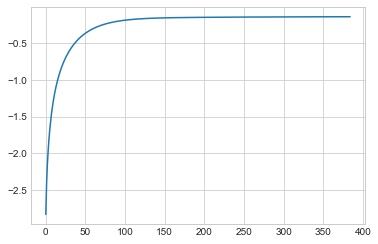

integral = 1.0018208010024834
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 475 iterations
Integral tracker values : 475,216


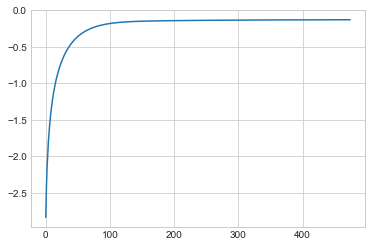

integral = 0.9993476293131784
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 315 iterations
Integral tracker values : 315,54


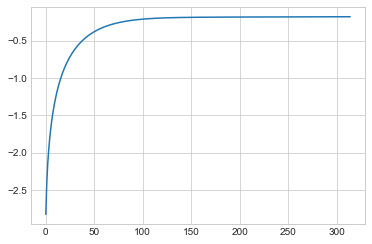

integral = 1.0033143691278439
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,22


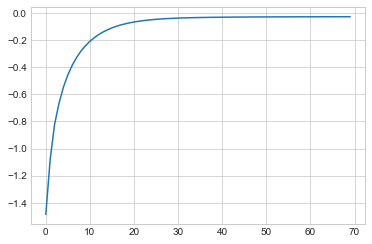

integral = 0.9998474545768197
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,27


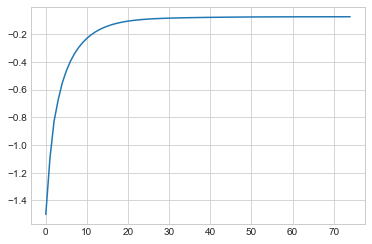

integral = 1.0033193136740146
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 75 iterations
Integral tracker values : 75,24


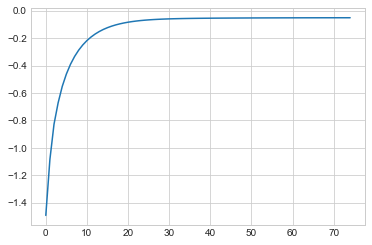

integral = 1.0013784269126882
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 65 iterations
Integral tracker values : 65,15


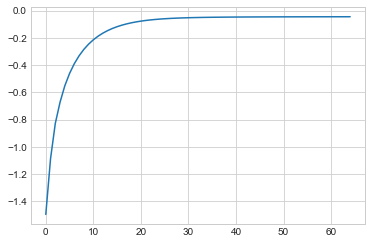

integral = 0.9998545071497901
sigma = 1, lambda = 0.002154434690031882, mu = 0.01
Finished after 80 iterations
Integral tracker values : 80,24


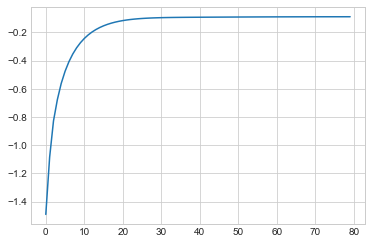

integral = 1.004757361236102
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Integral tracker values : 10099,0


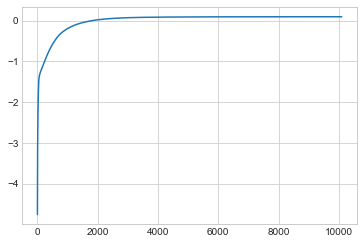

integral = 0.9690031186054491
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Integral tracker values : 10099,0


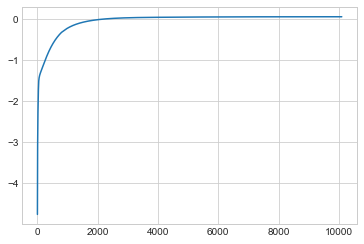

integral = 0.9728086685622033
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Finished after 7222 iterations
Integral tracker values : 7222,1204


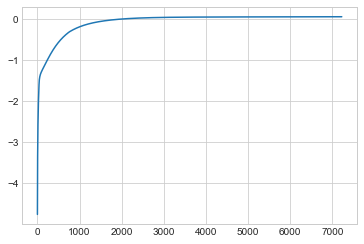

integral = 1.0009815656501952
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Integral tracker values : 10099,0


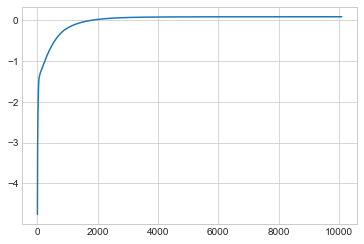

integral = 0.9719021927937108
sigma = 1, lambda = 0.046415888336127774, mu = 1e-06
Finished after 7462 iterations
Integral tracker values : 7462,1244


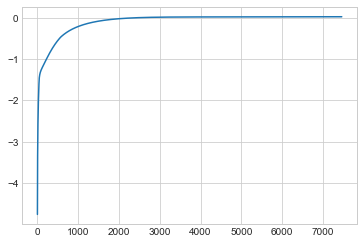

integral = 1.0044177628764546
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Integral tracker values : 2253,0


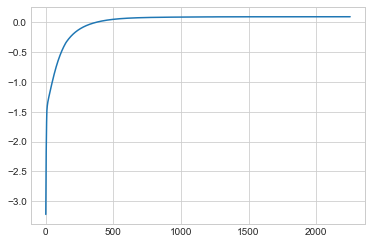

integral = 0.9822618787036995
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Integral tracker values : 2253,0


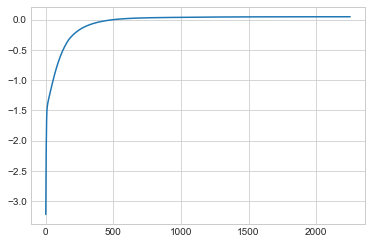

integral = 1.0813266961228896
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Finished after 1690 iterations
Integral tracker values : 1690,396


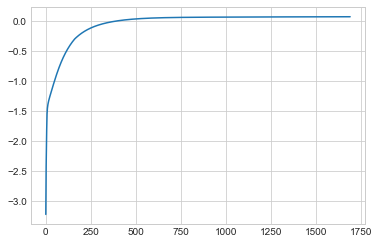

integral = 1.0032512129699365
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Integral tracker values : 2253,160


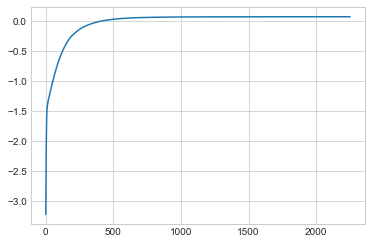

integral = 1.0025583405008875
sigma = 1, lambda = 0.046415888336127774, mu = 2.1544346900318823e-05
Finished after 1605 iterations
Integral tracker values : 1605,268


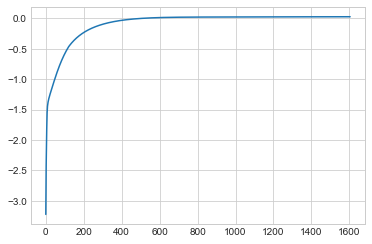

integral = 1.0043329134057344
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 507 iterations
Integral tracker values : 507,85


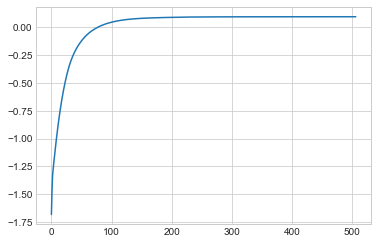

integral = 1.0057560396867493
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 553 iterations
Integral tracker values : 553,93


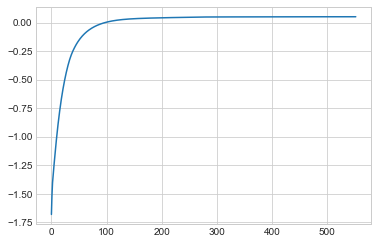

integral = 0.9995089524298693
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 533 iterations
Integral tracker values : 533,89


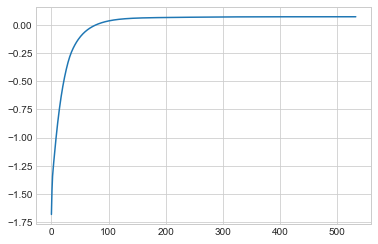

integral = 1.0035316441352455
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 437 iterations
Integral tracker values : 437,73


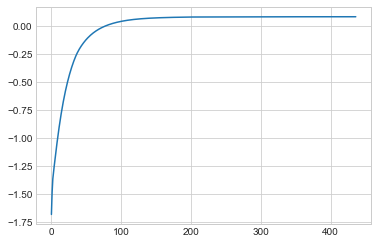

integral = 1.0016280342973185
sigma = 1, lambda = 0.046415888336127774, mu = 0.00046415888336127773
Finished after 360 iterations
Integral tracker values : 360,87


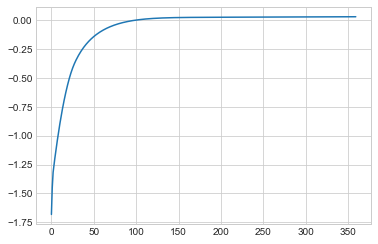

integral = 1.0066006397619516
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 64 iterations
Integral tracker values : 64,11


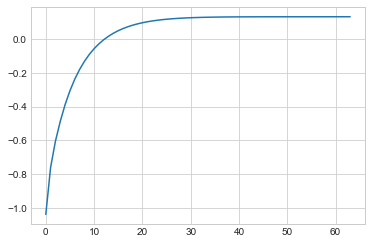

integral = 0.9945778743861466
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,13


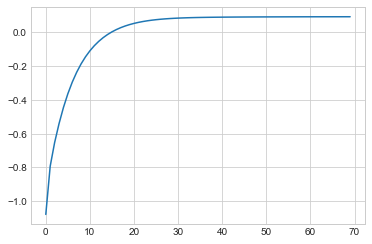

integral = 0.9992217805761241
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 65 iterations
Integral tracker values : 65,11


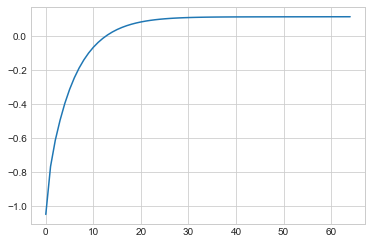

integral = 0.9970718884469196
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 74 iterations
Integral tracker values : 74,13


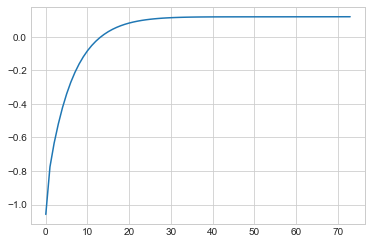

integral = 0.9978798742287823
sigma = 1, lambda = 0.046415888336127774, mu = 0.01
Finished after 70 iterations
Integral tracker values : 70,13


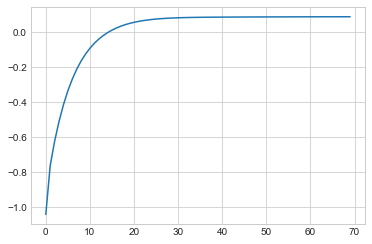

integral = 1.0022822493790249
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 3869 iterations
Integral tracker values : 3869,645


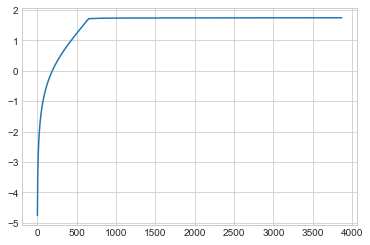

integral = 0.994451103304623
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 2672 iterations
Integral tracker values : 2672,446


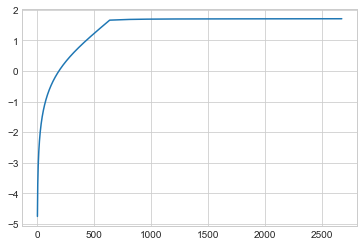

integral = 0.9923818691793432
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 4003 iterations
Integral tracker values : 4003,668


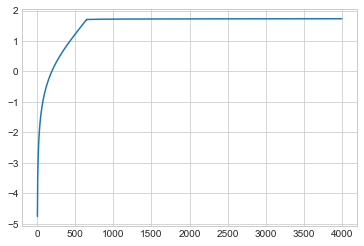

integral = 0.9966937507258
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 3819 iterations
Integral tracker values : 3819,637


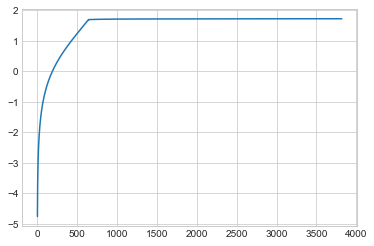

integral = 0.9948345475716958
sigma = 1, lambda = 1.0, mu = 1e-06
Finished after 3743 iterations
Integral tracker values : 3743,624


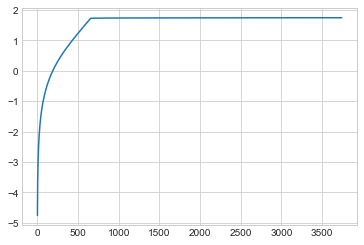

integral = 0.9949723421413111
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 782 iterations
Integral tracker values : 782,131


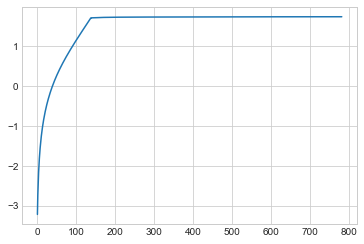

integral = 0.9934443259040173
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 549 iterations
Integral tracker values : 549,92


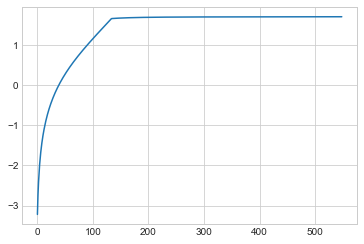

integral = 0.9929621351389566
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 838 iterations
Integral tracker values : 838,140


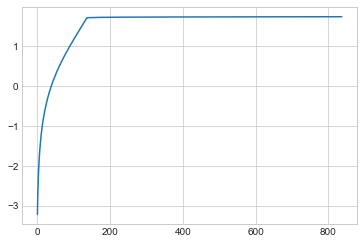

integral = 0.9963359322524452
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 787 iterations
Integral tracker values : 787,132


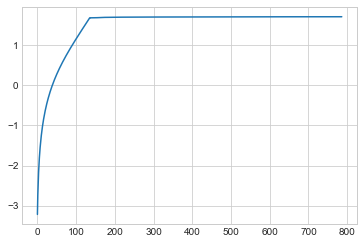

integral = 0.9943200113728612
sigma = 1, lambda = 1.0, mu = 2.1544346900318823e-05
Finished after 770 iterations
Integral tracker values : 770,129


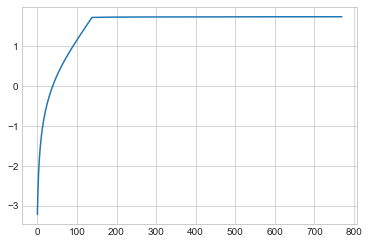

integral = 0.9943849670426369
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 94 iterations
Integral tracker values : 94,16


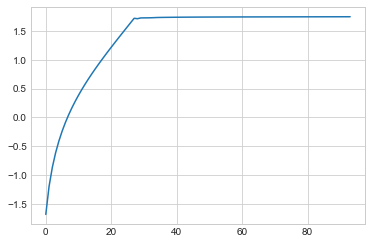

integral = 0.9913532093715011
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 99 iterations
Integral tracker values : 99,17


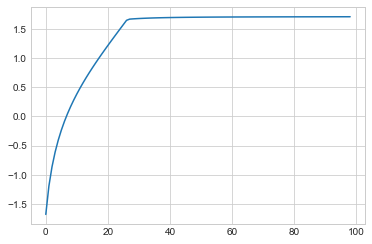

integral = 0.9950776145916472
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 153 iterations
Integral tracker values : 153,26


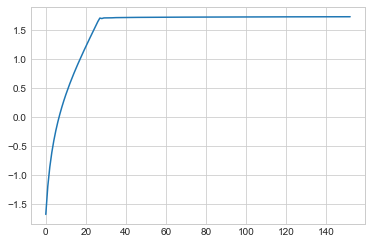

integral = 0.9948995355147863
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 128 iterations
Integral tracker values : 128,22


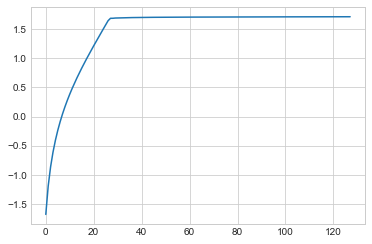

integral = 0.9931553967086033
sigma = 1, lambda = 1.0, mu = 0.00046415888336127773
Finished after 50 iterations
Integral tracker values : 50,20


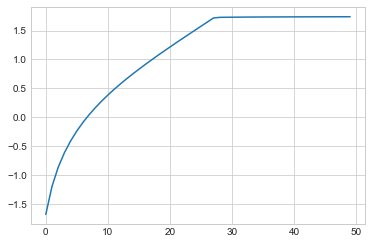

integral = 0.9914435775138171
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 55 iterations
Integral tracker values : 55,19


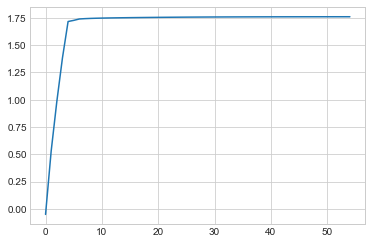

integral = 1.0010070624161196
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 65 iterations
Integral tracker values : 65,29


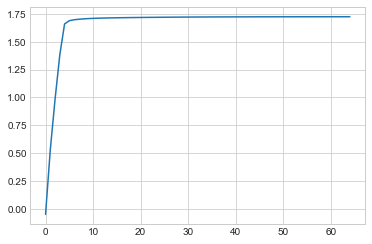

integral = 0.9980229244090697
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 60 iterations
Integral tracker values : 60,25


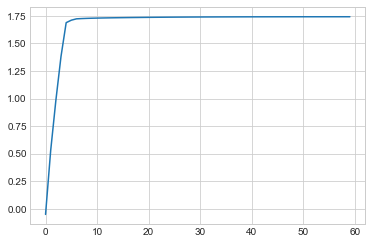

integral = 0.9993811149913454
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 55 iterations
Integral tracker values : 55,19


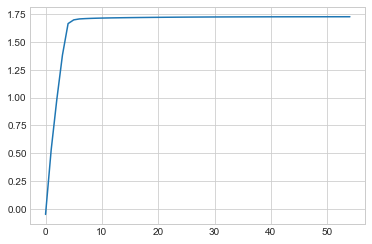

integral = 1.0007719094815466
sigma = 1, lambda = 1.0, mu = 0.01
Finished after 50 iterations
Integral tracker values : 50,16


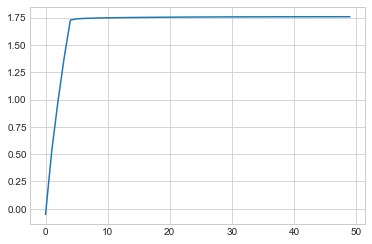

integral = 1.0011565377749119
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 440 iterations
Integral tracker values : 440,185


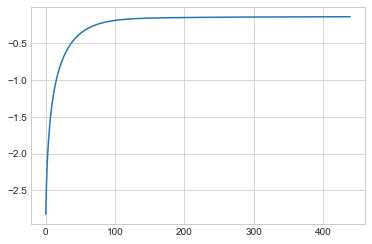

In [18]:
parameters = {'sigma' : [1], 'la' : np.logspace(-4,0,4),'mu' : np.logspace(-6,-2,4), 'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.QuadraticEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/our_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [4]:
model = utils.QuadraticEstimator

In [6]:
model.__name__

'QuadraticEstimator'

In [15]:
fixed_params = {
        'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
variable_params = {
    'la' : ['loguniform',1e-4,1e0],
    'mu' : ['loguniform',1e-4,1e-2]
}

X = data_set 
model = utils.QuadraticEstimator

#version = last_version + 1
version = 1

cv = 5
prune = True
n_trials =  3
save_path = f'models/density_estimation_1d_{model.__name__}_v{version}.pickle'

n_jobs = 1
eta = 1


    
    
    
            
        



In [18]:
study = perform_study(model,X, fixed_params = fixed_params, variable_params = variable_params,cv= cv, prune = prune, n_trials = n_trials,save_path = save_path,eta = eta,n_jobs = n_jobs)

NameError: name 'perform_study' is not defined

In [17]:
d = study.trials_dataframe()

[autoreload of npm_nnf.utils.utils_train failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/p36/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/envs/p36/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/

NameError: name 'study' is not defined

sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2782 iterations
Integral tracker values : 2782,464


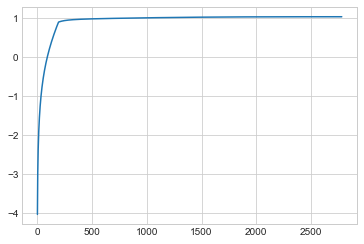

integral = 0.99533410841035
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2728 iterations
Integral tracker values : 2728,455


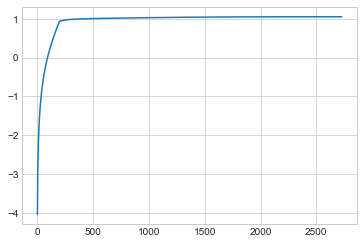

integral = 0.993970376647699
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2773 iterations
Integral tracker values : 2773,463


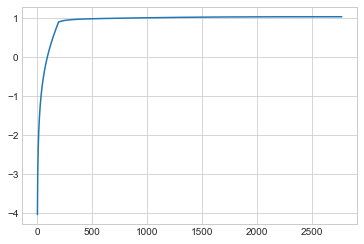

integral = 0.9948804221128698
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2799 iterations
Integral tracker values : 2799,467


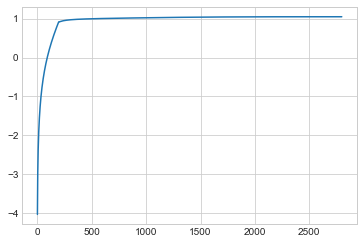

integral = 0.992927946165266
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2752 iterations
Integral tracker values : 2752,459


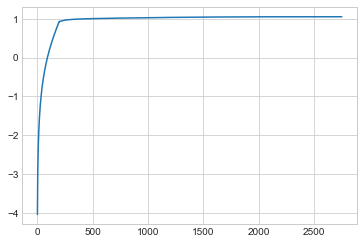

integral = 0.9932164256040266
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2602 iterations
Integral tracker values : 2602,434


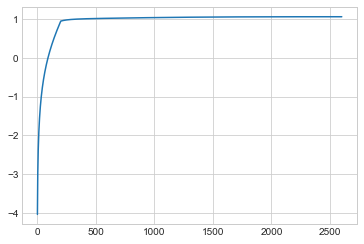

integral = 0.9941787393787768
sigma = 1, lambda = 0.5793308883818876, mu = 4.195445738362254e-06
Finished after 2777 iterations
Integral tracker values : 2777,463


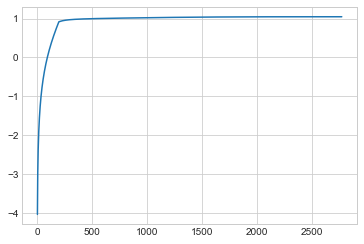

integral = 0.993288172325988
[1.44145541 1.33135111 1.44357025 1.33624862 1.33475595 1.30426736
 1.35317398]
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3399 iterations
Integral tracker values : 3399,567


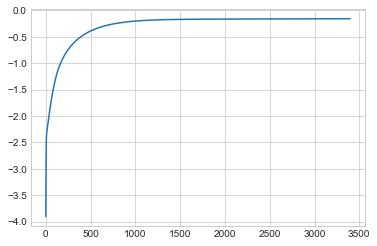

integral = 1.0058050058074677
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3203 iterations
Integral tracker values : 3203,534


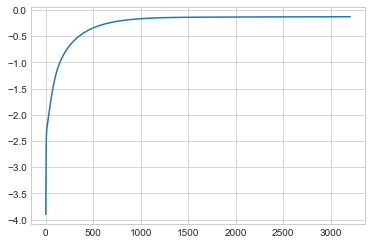

integral = 1.0057301108316408
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3445 iterations
Integral tracker values : 3445,604


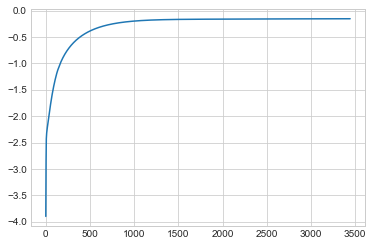

integral = 1.0056083904384971
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3439 iterations
Integral tracker values : 3439,574


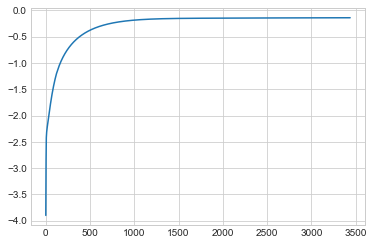

integral = 1.0065607353793131
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3230 iterations
Integral tracker values : 3230,539


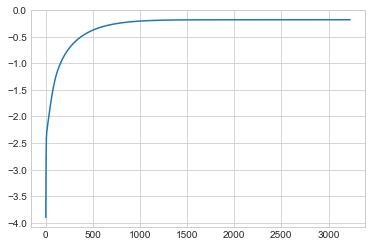

integral = 1.0051662753142943
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3230 iterations
Integral tracker values : 3230,539


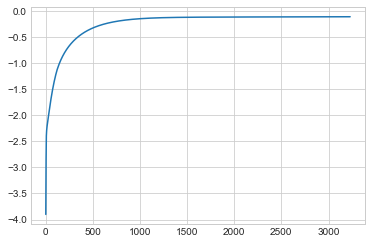

integral = 1.005013999368304
sigma = 1, lambda = 0.019489439233934522, mu = 5.539194696852e-06
Finished after 3635 iterations
Integral tracker values : 3635,746


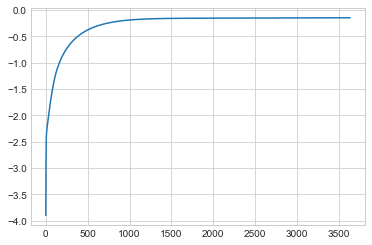

integral = 1.0076343143380728
[1.04202016 0.89077152 1.01760259 0.93450174 1.21849813 0.78849341
 0.97756322]
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,349


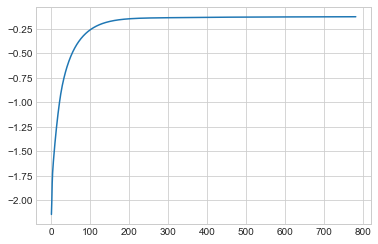

integral = 0.9971211005436755
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Finished after 765 iterations
Integral tracker values : 765,335


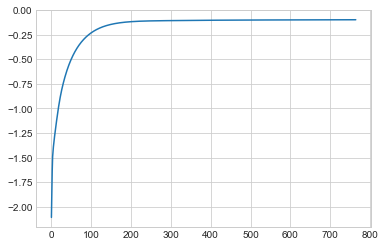

integral = 0.9968704630680694
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,347


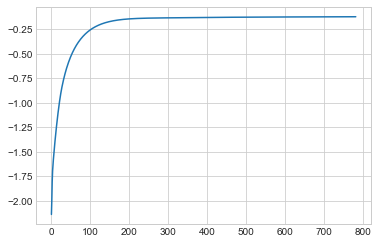

integral = 0.998340772863693
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,344


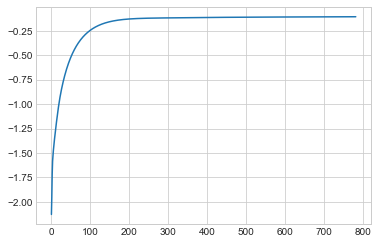

integral = 0.9967287868595505
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Finished after 520 iterations
Integral tracker values : 520,87


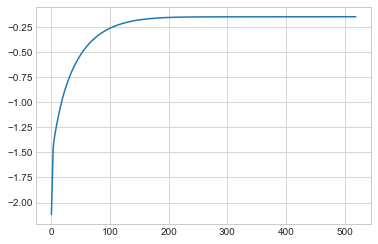

integral = 1.0049131126970963
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,370


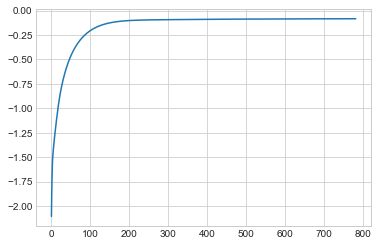

integral = 0.9980463489484377
sigma = 1, lambda = 0.024507247224811672, mu = 0.0002134438413017661
Integral tracker values : 783,340


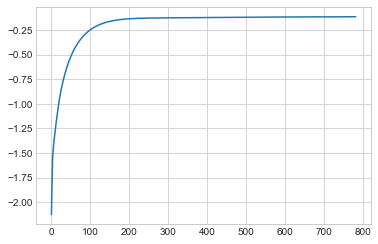

integral = 0.9985836352938401
[1.05287524 0.90938114 1.02358987 0.94768603 1.22975282 0.80149261
 0.99136373]
sigma = 1, lambda = 0.11883042579131936, mu = 2.4152848858919328e-05
Integral tracker values : 2133,127


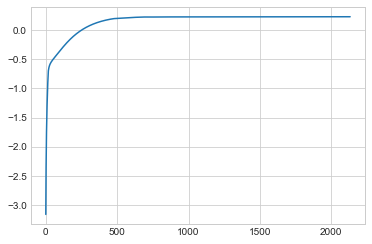

integral = 1.0066381658332608
sigma = 1, lambda = 0.11883042579131936, mu = 2.4152848858919328e-05
Integral tracker values : 2133,187


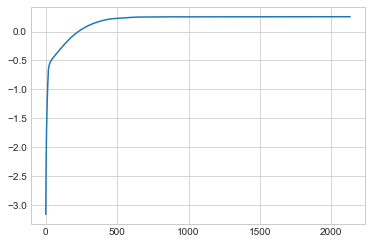

integral = 1.0062876197694612
[1.20976686 1.07345556]
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2843 iterations
Integral tracker values : 2843,474


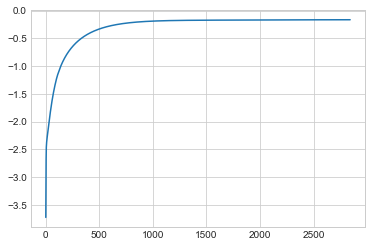

integral = 1.0056702681420544
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2681 iterations
Integral tracker values : 2681,447


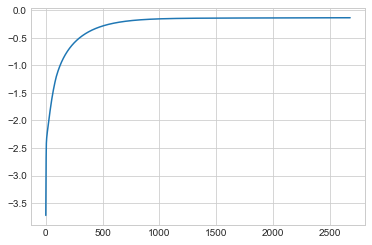

integral = 1.0057393772903518
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2995 iterations
Integral tracker values : 2995,615


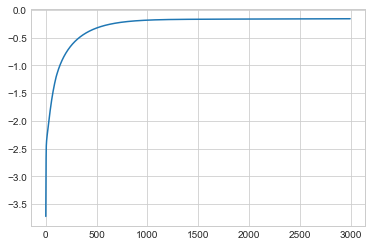

integral = 1.0072153050991468
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2965 iterations
Integral tracker values : 2965,569


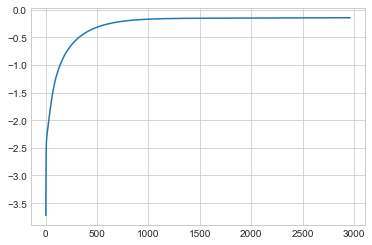

integral = 1.0077717882581512
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2835 iterations
Integral tracker values : 2835,473


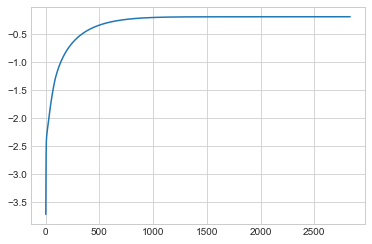

integral = 1.0051675148154198
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 2703 iterations
Integral tracker values : 2703,451


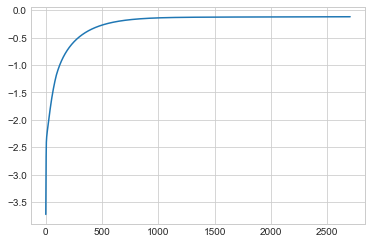

integral = 1.005012429339013
sigma = 1, lambda = 0.018403883384064876, mu = 7.895653844317188e-06
Finished after 3195 iterations
Integral tracker values : 3195,777


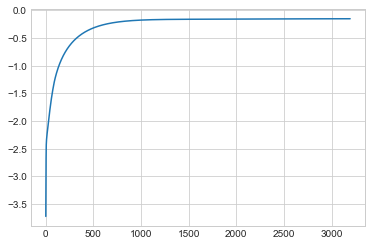

integral = 1.008374251222126
[1.04235042 0.88997562 1.01519807 0.93084229 1.21644744 0.78728702
 0.97404512]
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 590 iterations
Integral tracker values : 590,239


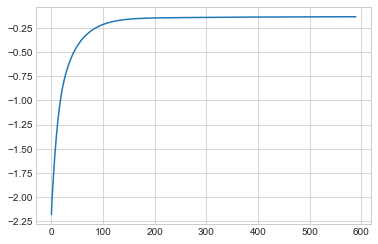

integral = 0.9992071937134993
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 485 iterations
Integral tracker values : 485,153


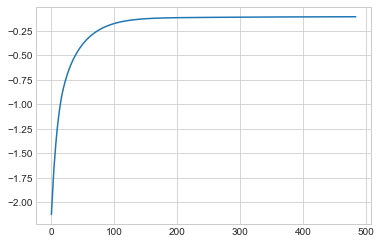

integral = 1.0052804204282406
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 690 iterations
Integral tracker values : 690,353


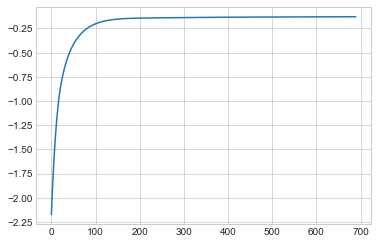

integral = 0.9985673271688544
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Integral tracker values : 739,400


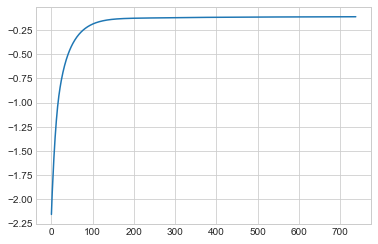

integral = 1.001091555885912
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 401 iterations
Integral tracker values : 401,67


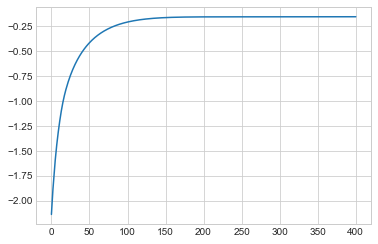

integral = 1.0046951596462115
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Finished after 580 iterations
Integral tracker values : 580,245


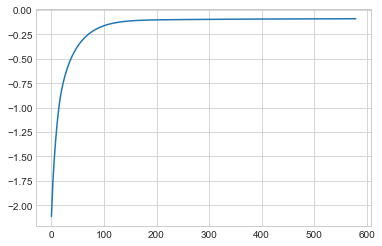

integral = 0.9977575603996415
sigma = 1, lambda = 0.022912722773984193, mu = 0.00024362253723096065
Integral tracker values : 739,380


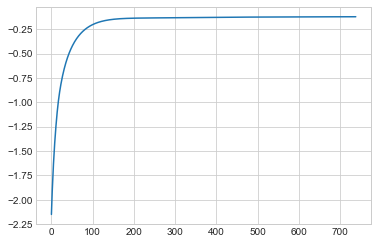

integral = 0.9988864118532828
[1.05039298 0.89670964 1.02320366 0.93939685 1.22742057 0.80069646
 0.98777573]
sigma = 1, lambda = 0.16684784868559935, mu = 3.274061541320525e-05
Finished after 1453 iterations
Integral tracker values : 1453,243


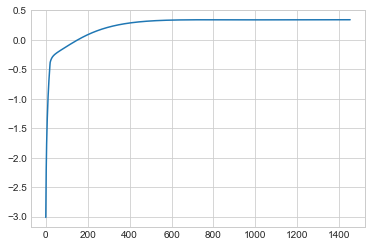

integral = 1.0061917152912383
sigma = 1, lambda = 0.16684784868559935, mu = 3.274061541320525e-05
Integral tracker values : 1846,0


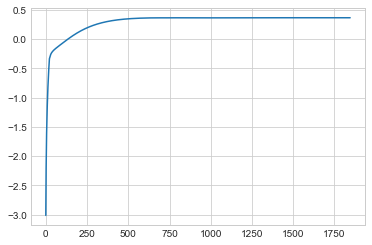

integral = 1.0117120847209997
[1.33862195 1.19717807]
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6662 iterations
Integral tracker values : 6662,1111


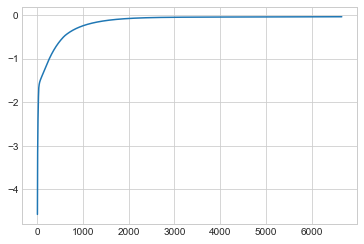

integral = 1.0053986798804984
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6622 iterations
Integral tracker values : 6622,1104


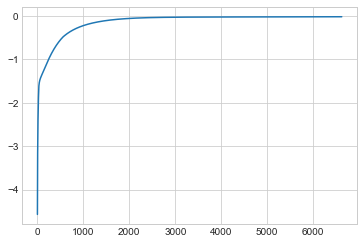

integral = 1.0050124431366978
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6691 iterations
Integral tracker values : 6691,1116


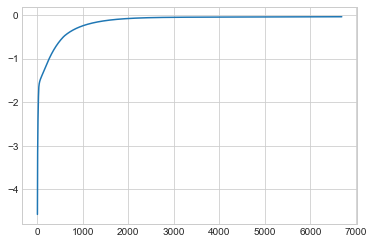

integral = 1.004509119288261
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6730 iterations
Integral tracker values : 6730,1122


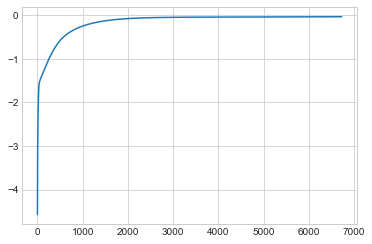

integral = 1.0058106208998927
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6680 iterations
Integral tracker values : 6680,1114


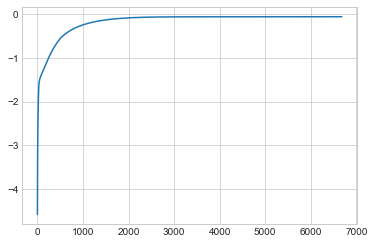

integral = 1.0048022181311325
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6358 iterations
Integral tracker values : 6358,1060


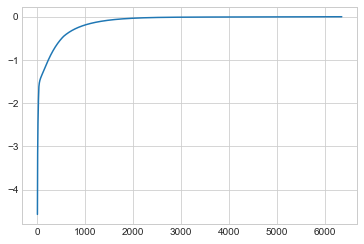

integral = 1.0043033051926007
sigma = 1, lambda = 0.04285611718667939, mu = 1.4440145920235685e-06
Finished after 6801 iterations
Integral tracker values : 6801,1134


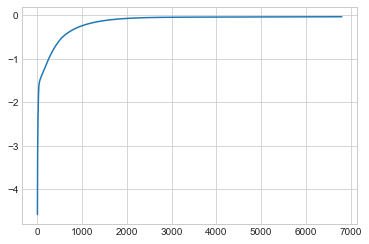

integral = 1.0052883803938495
[1.04835566 0.90813888 1.03129597 0.9747955  1.25870287 0.81180182
 1.01789692]
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 280 iterations
Integral tracker values : 280,66


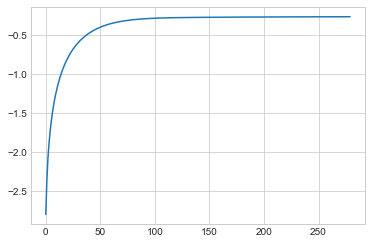

integral = 1.008394521646785
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 265 iterations
Integral tracker values : 265,66


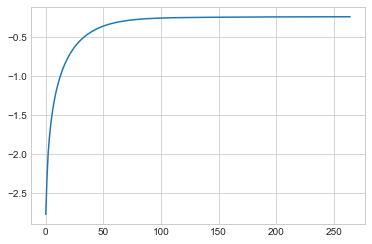

integral = 1.0082193347758224
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 385 iterations
Integral tracker values : 385,171


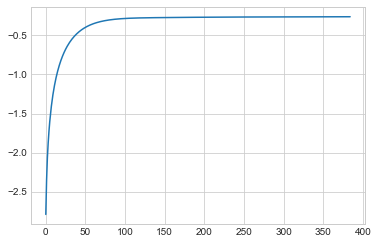

integral = 0.9966405809154033
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 415 iterations
Integral tracker values : 415,204


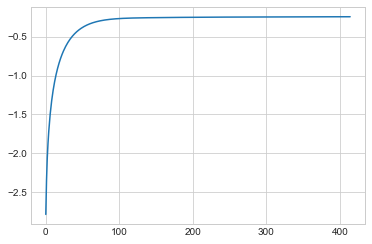

integral = 0.9973270359247276
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 242 iterations
Integral tracker values : 242,41


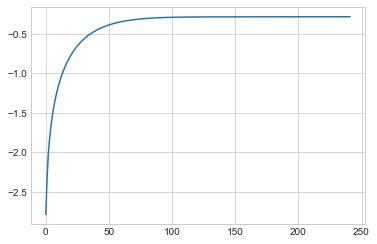

integral = 1.0051829363361047
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 350 iterations
Integral tracker values : 350,149


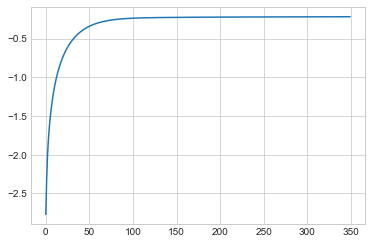

integral = 0.9963428337301368
sigma = 1, lambda = 0.0003763426968557542, mu = 0.0006920710874490354
Finished after 425 iterations
Integral tracker values : 425,220


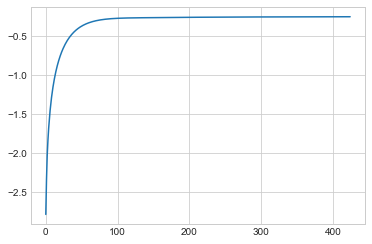

integral = 1.000137477930887
[1.03214483 0.8626124  1.00628127 0.92474059 1.18946275 0.75856024
 0.95339942]
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 4568 iterations
Integral tracker values : 4568,762


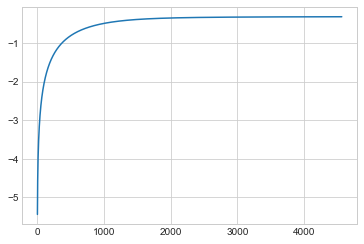

integral = 1.0012425596761365
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5141 iterations
Integral tracker values : 5141,857


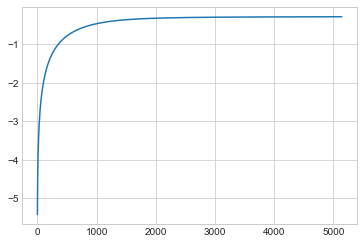

integral = 1.0072673592720658
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5134 iterations
Integral tracker values : 5134,856


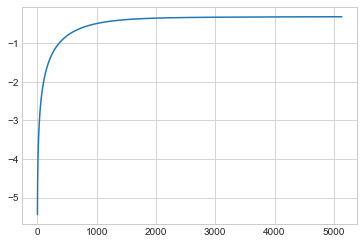

integral = 1.0043115905828817
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Integral tracker values : 7589,932


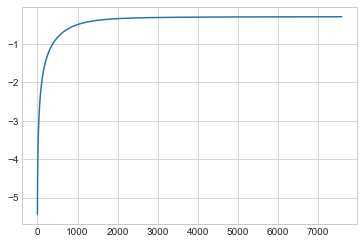

integral = 1.0075099529858789
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5473 iterations
Integral tracker values : 5473,913


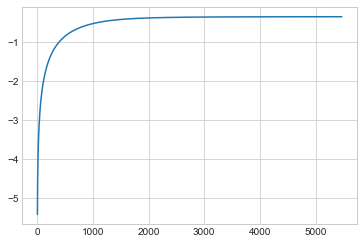

integral = 1.0070954127077947
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 4718 iterations
Integral tracker values : 4718,787


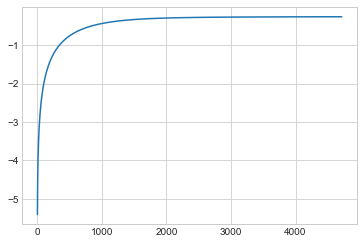

integral = 1.000153044109352
sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 6057 iterations
Integral tracker values : 6057,1010


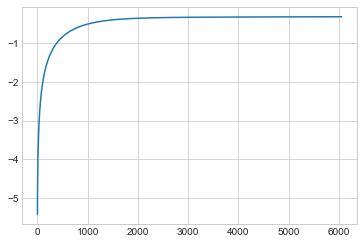

integral = 0.995460782699462
[1.01812769 0.81081824 0.97075092 0.9045152  1.23508991 0.66739464
 0.97779197]



In [11]:
prun = PrunedCVbis(7, 0.05,minimize = True)
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, data_set,  
                                       utils.QuadraticEstimator,prun), 
               n_trials=10, show_progress_bar=True, n_jobs=1);

In [12]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0       0  1.363546 2020-10-16 10:00:06.252135 2020-10-16 10:01:01.204548   
1       1  0.981350 2020-10-16 10:01:01.206183 2020-10-16 10:02:08.457581   
2       2  0.993734 2020-10-16 10:02:08.458955 2020-10-16 10:02:24.579371   
3       3  1.141611 2020-10-16 10:02:24.580782 2020-10-16 10:02:36.651720   
4       4  0.979449 2020-10-16 10:02:36.653217 2020-10-16 10:03:34.667466   
5       5  0.989371 2020-10-16 10:03:34.668929 2020-10-16 10:03:47.668402   
6       6  1.267900 2020-10-16 10:03:47.670114 2020-10-16 10:03:57.115630   
7       7  1.007284 2020-10-16 10:03:57.117245 2020-10-16 10:06:10.554212   
8       8  0.961029 2020-10-16 10:06:10.555634 2020-10-16 10:06:18.380213   
9       9  0.940641 2020-10-16 10:06:18.381597 2020-10-16 10:08:08.599664   

         duration  params_la  params_mu  user_attrs_accuracy  \
0 00:00:54.952413   0.579331   0.000004             1.363546   
1 00:01:07.251398   0.019489   0.000006             0.981350   
2 00:00:16.120416   0.024507   0.000213             0.993734   
3 00:00:12.070938   0.118830   0.000024             1.141611   
4 00:00:58.014249   0.018404   0.000008             0.979449   
5 00:00:12.999473   0.022913   0.000244             0.989371   
6 00:00:09.445516   0.166848   0.000033             1.267900   
7 00:02:13.436967   0.042856   0.000001             1.007284   
8 00:00:07.824579   0.000376   0.000692             0.961029   
9 00:01:50.218067   0.000366   0.000002             0.940641   

   user_attrs_len_cv  user_attrs_std     state  
0                  7        0.051694  COMPLETE  
1                  7        0.124695  COMPLETE  
2                  7        0.123226  COMPLETE  
3                  2        0.068156  COMPLETE  
4                  7        0.124629  COMPLETE  
5                  7        0.124338  COMPLETE  
6                  2        0.070722  COMPLETE  
7                  7        0.127999  COMPLETE  
8                  7        0.126119  COMPLETE  
9                  7        0.163800  COMPLETE

In [24]:
best_params = {'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
for key in study.best_params.keys():
    best_params[key] = study.best_params[key]

sigma = 1, lambda = 0.00036551989014687984, mu = 1.7821204007760248e-06
Finished after 5642 iterations
Integral tracker values : 5642,941


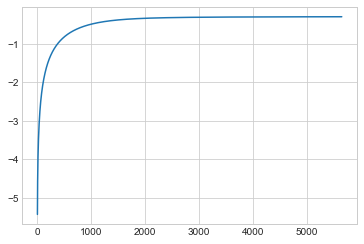

In [25]:
model = utils.QuadraticEstimator(**best_params)
model.fit(data_set)

{'Niter': 'auto', 'eta_base': 5, 'la': 0.002154434690031882, 'mu': 0.00046415888336127773, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 0.002154434690031882, mu = 0.00046415888336127773
Finished after 440 iterations
Integral tracker values : 440,185


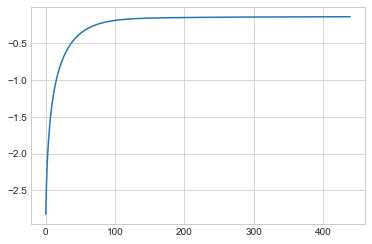

In [19]:
version = 1
filename = f'models/our_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.QuadraticEstimator(**params_best)
model.fit(data_set)

In [20]:
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_Niter  \
0       18.030776      3.450421         0.002359        0.000089        auto   
1        4.195518      0.767030         0.002365        0.000049        auto   
2        1.127739      0.192162         0.002334        0.000063        auto   
3        0.293080      0.009318         0.002206        0.000160        auto   
4       18.334845      2.976535         0.002300        0.000090        auto   
5        4.568544      0.496406         0.002410        0.000072        auto   
6        1.225013      0.257944         0.002331        0.000039        auto   
7        0.319706      0.037092         0.002311        0.000210        auto   
8       23.731344      4.092876         0.002338        0.000177        auto   
9        5.197838      0.977497         0.002350        0.000116        auto   
10       1.288060      0.186890         0.002443        0.000273        auto   
11       0.304821      0.029462         0.002417        0.000238        auto   
12       9.082664      1.186086         0.002395        0.000194        auto   
13       1.948470      0.226434         0.002673        0.000215        auto   
14       0.360702      0.083803         0.002441        0.000194        auto   
15       0.251519      0.016307         0.002106        0.000108        auto   

   param_eta_base    param_la     param_mu param_mu_base param_sigma  \
0               5      0.0001        1e-06  [tensor(0.)]           1   
1               5      0.0001  2.15443e-05  [tensor(0.)]           1   
2               5      0.0001  0.000464159  [tensor(0.)]           1   
3               5      0.0001         0.01  [tensor(0.)]           1   
4               5  0.00215443        1e-06  [tensor(0.)]           1   
5               5  0.00215443  2.15443e-05  [tensor(0.)]           1   
6               5  0.00215443  0.000464159  [tensor(0.)]           1   
7               5  0.00215443         0.01  [tensor(0.)]           1   
8               5   0.0464159        1e-06  [tensor(0.)]           1   
9               5   0.0464159  2.15443e-05  [tensor(0.)]           1   
10              5   0.0464159  0.000464159  [tensor(0.)]           1   
11              5   0.0464159         0.01  [tensor(0.)]           1   
12              5           1        1e-06  [tensor(0.)]           1   
13              5           1  2.15443e-05  [tensor(0.)]           1   
14              5           1  0.000464159  [tensor(0.)]           1   
15              5           1         0.01  [tensor(0.)]           1   

                                               params  split0_test_score  \
0   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -0.876481   
1   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -0.882843   
2   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -0.911276   
3   {'Niter': 'auto', 'eta_base': 5, 'la': 0.0001,...          -1.002872   
4   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -0.906902   
5   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -0.904534   
6   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -0.914075   
7   {'Niter': 'auto', 'eta_base': 5, 'la': 0.00215...          -1.006854   
8   {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.022287   
9   {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.010970   
10  {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.026326   
11  {'Niter': 'auto', 'eta_base': 5, 'la': 0.04641...          -1.093141   
12  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.382281   
13  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.382822   
14  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.383425   
15  {'Niter': 'auto', 'eta_base': 5, 'la': 1.0, 'm...          -1.379087   

    split1_test_score  split2_test_score  split3_test_score  \
0           -1.220798          -1.118069          -1.096010   

integral = 0.9997477434694086
integral = 0.9997477434694086


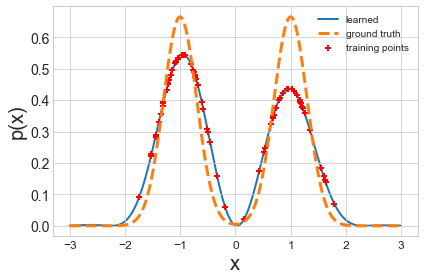

In [21]:
c,r,ntest = 0,3,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# Nadaraya Watson

In [20]:
#Model

In [21]:
model = utils.NadarayaWatsonEstimator

In [22]:
#Data set 

In [23]:
X = data_set 

In [24]:
#Last version : 

In [25]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 0


In [26]:
fixed_params = {
        'sigma' : 1, 
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
variable_params = {
    'la' : ['loguniform',1e-6,1e0],
}


cv = 5
prune = True
n_trials =  20


n_jobs = 1
eta = 0



sigma = 1, lambda = 0.1581173539261472
 norm of the constraint : 1.538009347974476
Finished after 1745 iterations


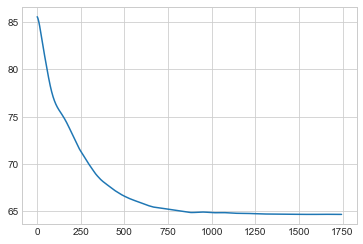

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.1581173539261472
 norm of the constraint : 1.5387778832362604
Finished after 1425 iterations


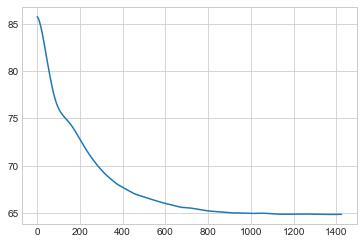

integral = tensor([[1.]])
sigma = 1, lambda = 0.1581173539261472
 norm of the constraint : 1.5380045632559332
Finished after 1885 iterations


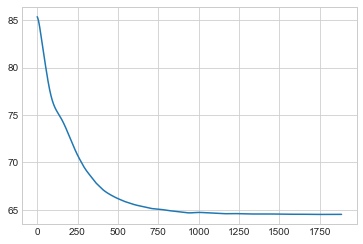

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.1581173539261472
 norm of the constraint : 1.5392671728680023
Finished after 1800 iterations


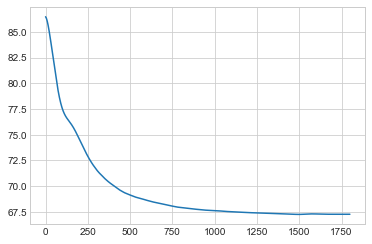

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.1581173539261472
 norm of the constraint : 1.5392716374770605
Finished after 1965 iterations


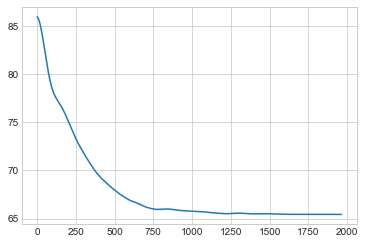

integral = tensor([[1.]])
servelastsplit
1.602703853143105
[1.60620157 1.60368811 1.60311881 1.59182662 1.60868416]
endservelastsplit
here we are 
1.602703853143105
[1.60620157 1.60368811 1.60311881 1.59182662 1.60868416]
sigma = 1, lambda = 0.005428519401288159
 norm of the constraint : 1.538009347974476
Finished after 13675 iterations


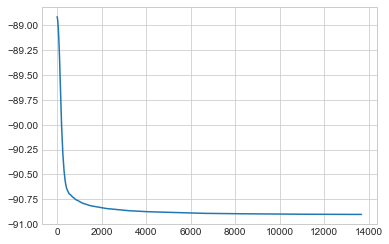

integral = tensor([[1.]])
sigma = 1, lambda = 0.005428519401288159
 norm of the constraint : 1.5387778832362604
Finished after 10220 iterations


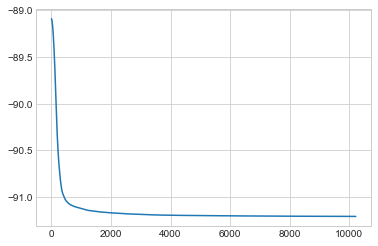

integral = tensor([[1.]])
sigma = 1, lambda = 0.005428519401288159
 norm of the constraint : 1.5380045632559332
Finished after 9540 iterations


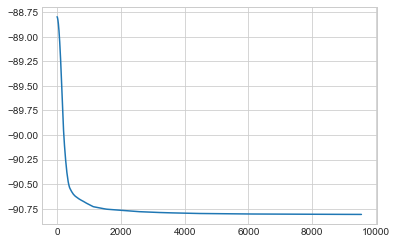

integral = tensor([[1.]])
sigma = 1, lambda = 0.005428519401288159
 norm of the constraint : 1.5392671728680023
Finished after 8510 iterations


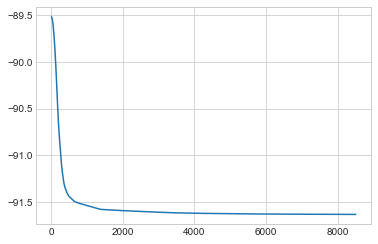

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.005428519401288159
 norm of the constraint : 1.5392716374770605
Finished after 8560 iterations


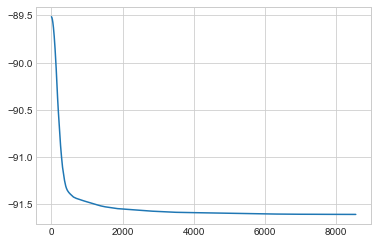

integral = tensor([[1.]])
servelastsplit
1.4400726811544642
[1.42121581 1.43683783 1.41536248 1.46308201 1.46386528]
endservelastsplit
here we are 
1.4400726811544642
[1.42121581 1.43683783 1.41536248 1.46308201 1.46386528]
sigma = 1, lambda = 0.0005295714949401755
 norm of the constraint : 1.538009347974476
Finished after 6000 iterations


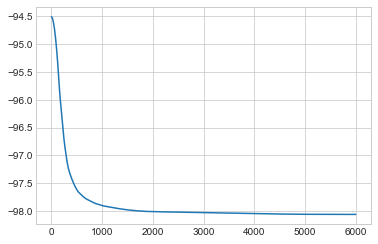

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0005295714949401755
 norm of the constraint : 1.5387778832362604
Finished after 4965 iterations


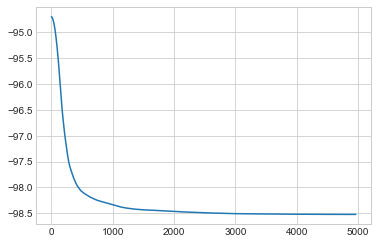

integral = tensor([[1.]])
sigma = 1, lambda = 0.0005295714949401755
 norm of the constraint : 1.5380045632559332
Finished after 8715 iterations


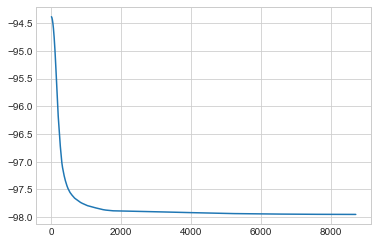

integral = tensor([[1.]])
sigma = 1, lambda = 0.0005295714949401755
 norm of the constraint : 1.5392671728680023
Finished after 5280 iterations


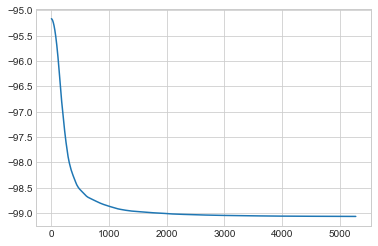

integral = tensor([[1.]])
sigma = 1, lambda = 0.0005295714949401755
 norm of the constraint : 1.5392716374770605
Finished after 3785 iterations


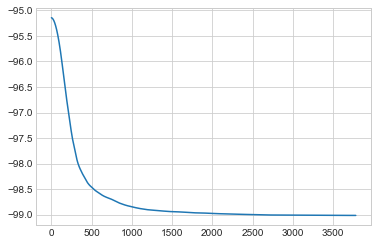

integral = tensor([[1.]])
servelastsplit
1.430250143497338
[1.40208737 1.42945421 1.39397577 1.46386748 1.46186589]
endservelastsplit
here we are 
1.430250143497338
[1.40208737 1.42945421 1.39397577 1.46386748 1.46186589]
sigma = 1, lambda = 0.002634028183290103
 norm of the constraint : 1.538009347974476
Finished after 8630 iterations


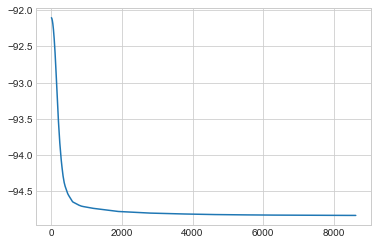

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002634028183290103
 norm of the constraint : 1.5387778832362604
Finished after 4355 iterations


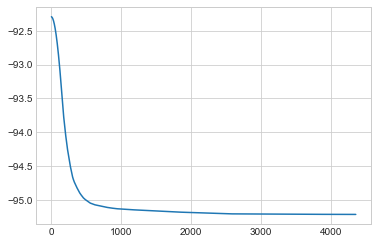

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002634028183290103
 norm of the constraint : 1.5380045632559332
Finished after 7525 iterations


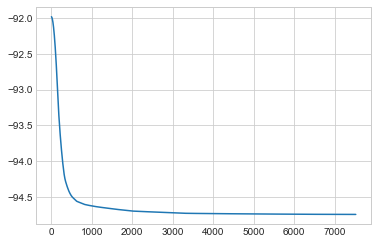

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002634028183290103
 norm of the constraint : 1.5392671728680023
Finished after 5670 iterations


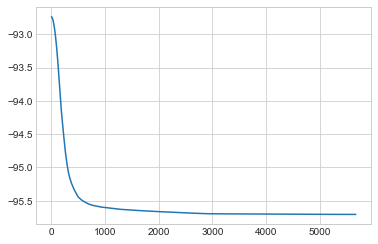

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002634028183290103
 norm of the constraint : 1.5392716374770605
Finished after 8015 iterations


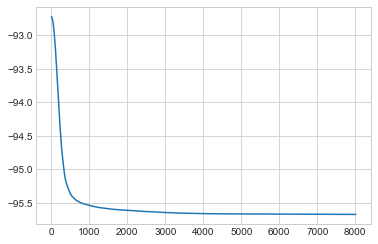

integral = tensor([[1.]])
servelastsplit
1.433594153285352
[1.41121544 1.43203062 1.40342262 1.46082307 1.46047901]
endservelastsplit
here we are 
1.433594153285352
[1.41121544 1.43203062 1.40342262 1.46082307 1.46047901]
sigma = 1, lambda = 0.040556278328457755
 norm of the constraint : 1.538009347974476
Finished after 6480 iterations


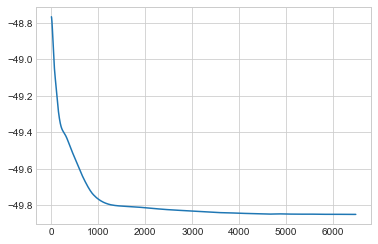

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.040556278328457755
 norm of the constraint : 1.5387778832362604
Finished after 6705 iterations


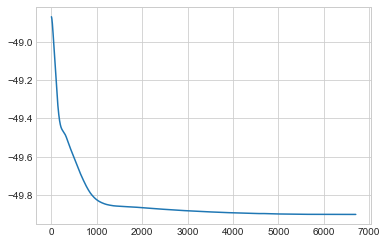

integral = tensor([[1.]])
here we are 
1.5580389029902637
[1.54010131 1.54443041]
sigma = 1, lambda = 0.22226874997404053
 norm of the constraint : 1.538009347974476
Finished after 1325 iterations


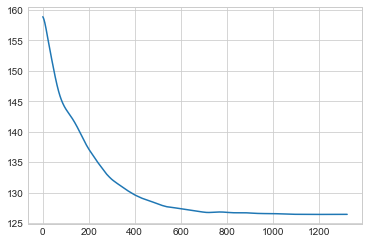

integral = tensor([[1.]])
sigma = 1, lambda = 0.22226874997404053
 norm of the constraint : 1.5387778832362604
Finished after 1165 iterations


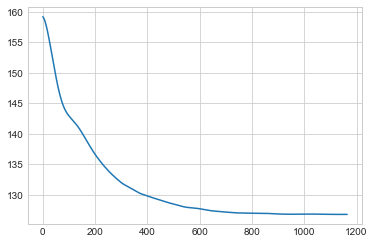

integral = tensor([[1.0000]])
here we are 
1.6243230456679372
[1.60818211 1.60757582]
sigma = 1, lambda = 5.624689848542239e-06
 norm of the constraint : 1.538009347974476
Finished after 4310 iterations


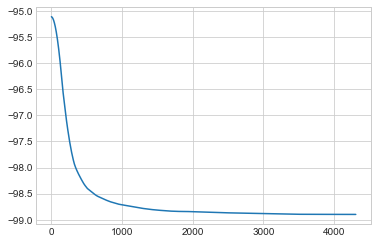

integral = tensor([[1.]])
sigma = 1, lambda = 5.624689848542239e-06
 norm of the constraint : 1.5387778832362604
Finished after 8960 iterations


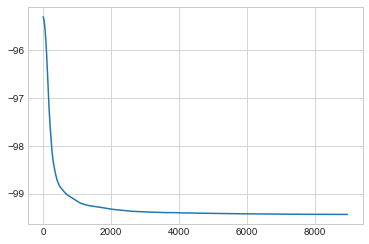

integral = tensor([[1.]])
sigma = 1, lambda = 5.624689848542239e-06
 norm of the constraint : 1.5380045632559332
Finished after 15255 iterations


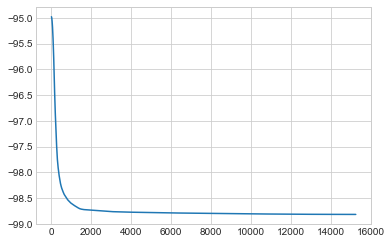

integral = tensor([[1.0000]])
sigma = 1, lambda = 5.624689848542239e-06
 norm of the constraint : 1.5392671728680023
Finished after 8245 iterations


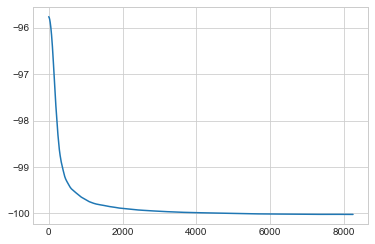

integral = tensor([[1.0000]])
sigma = 1, lambda = 5.624689848542239e-06
 norm of the constraint : 1.5392716374770605
Finished after 7885 iterations


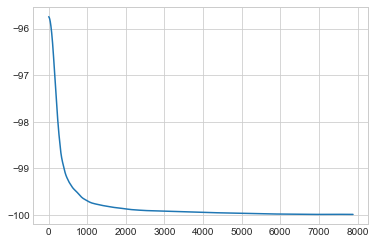

integral = tensor([[1.]])
servelastsplit
1.4308683064049899
[1.40102507 1.4293312  1.39097153 1.46725523 1.4657585 ]
endservelastsplit
here we are 
1.4308683064049899
[1.40102507 1.4293312  1.39097153 1.46725523 1.4657585 ]
sigma = 1, lambda = 0.021255088510547717
 norm of the constraint : 1.538009347974476


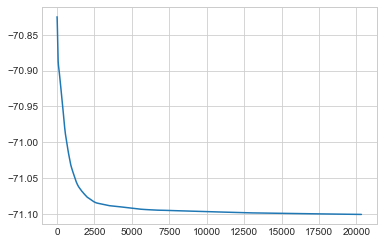

integral = tensor([[1.]])
sigma = 1, lambda = 0.021255088510547717
 norm of the constraint : 1.5387778832362604


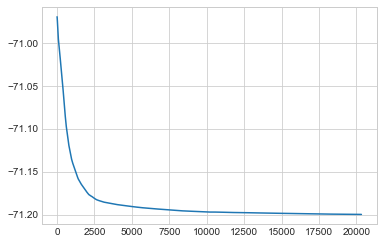

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.021255088510547717
 norm of the constraint : 1.5380045632559332


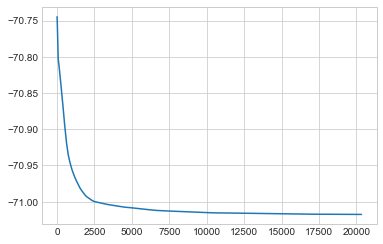

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.021255088510547717
 norm of the constraint : 1.5392671728680023


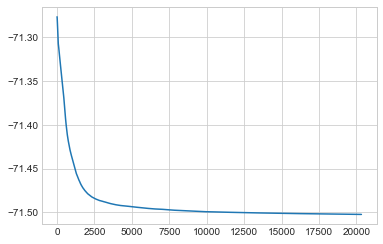

integral = tensor([[1.]])
sigma = 1, lambda = 0.021255088510547717
 norm of the constraint : 1.5392716374770605



KeyboardInterrupt: 

In [27]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path,version = None,eta = 0,n_jobs = 1)

In [ ]:
version = None
df,best_params,aux = utils_train.get_results(save_path,model = model,version = version)
display(df)

In [ ]:
eta = 0
params = aux(eta)
print(params)

In [ ]:
clf = model(**params)
clf.fit(X)

integral = 0.9939293833500662
integral = 0.9939293833500662


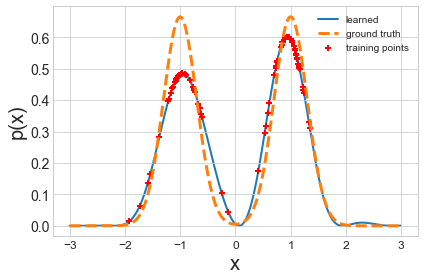

In [30]:
c,r,ntest = 0,3,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = clf.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set =clf.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

In [13]:
version = find_last_version(path = 'models/nw_model_1D',extension = 'pickle')

print(f'last version number : {version}')

last version number : 1


sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


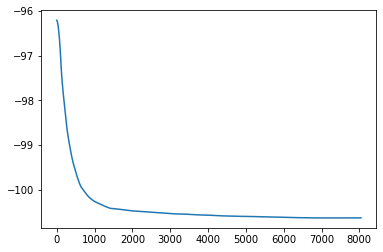

integral = tensor([[1.0000]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.539551426990418
Finished after 5874 iterations


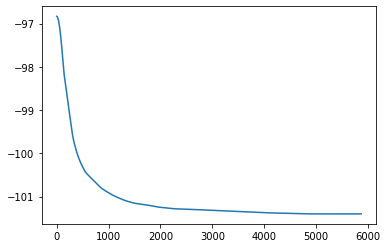

integral = tensor([[1.]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


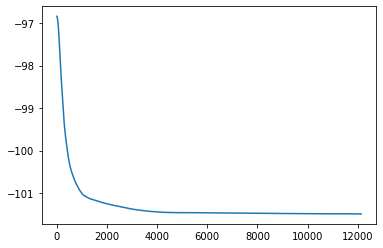

integral = tensor([[1.0000]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


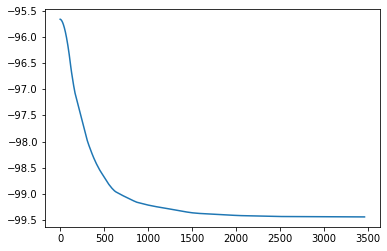

integral = tensor([[1.0000]])
sigma = 1, lambda = 1e-08
 norm of the constraint : 1.5410987498824118
Finished after 11390 iterations


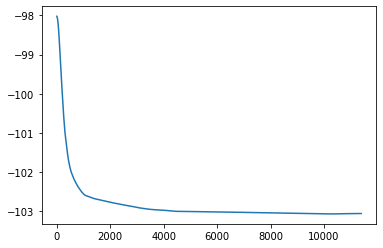

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


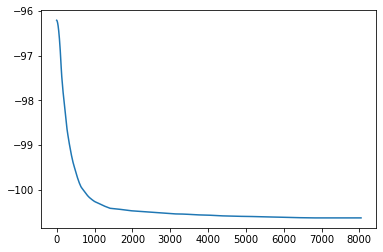

integral = tensor([[1.]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.539551426990418
Finished after 5874 iterations


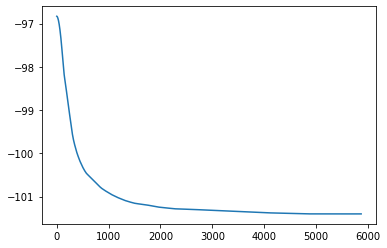

integral = tensor([[1.]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


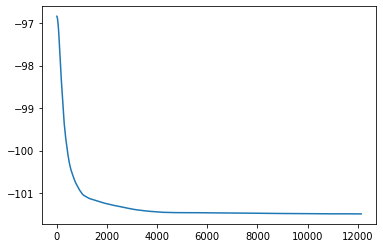

integral = tensor([[1.]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


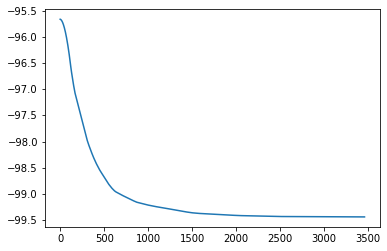

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.6366508987303555e-08
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


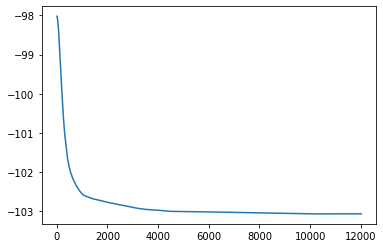

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


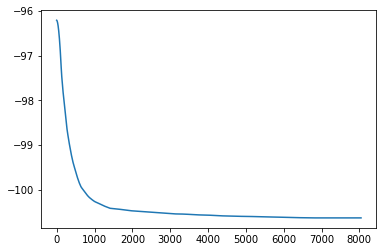

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.539551426990418
Finished after 5874 iterations


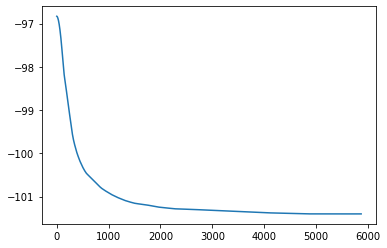

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


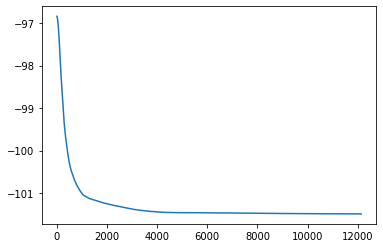

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


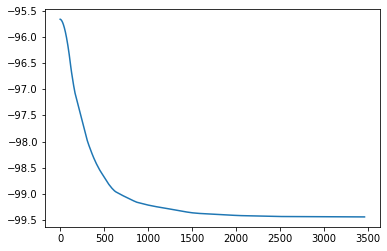

integral = tensor([[1.]])
sigma = 1, lambda = 6.951927961775605e-08
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


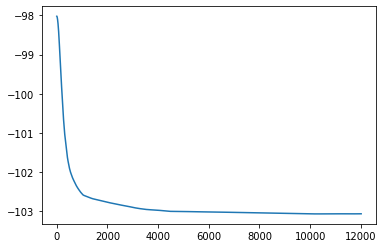

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


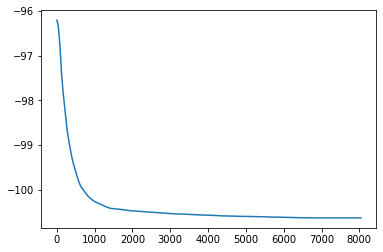

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.539551426990418
Finished after 5875 iterations


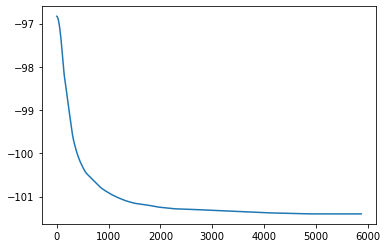

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5405349350854882
Finished after 12140 iterations


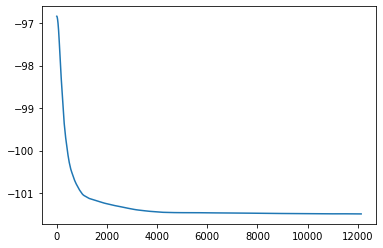

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


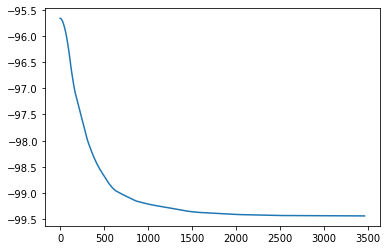

integral = tensor([[1.]])
sigma = 1, lambda = 1.8329807108324375e-07
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


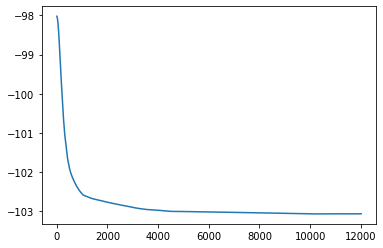

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5399332496674758
Finished after 8045 iterations


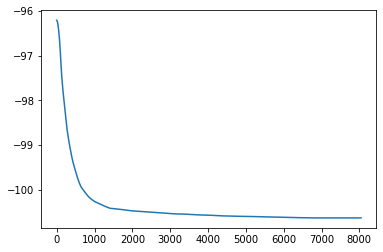

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.539551426990418
Finished after 5875 iterations


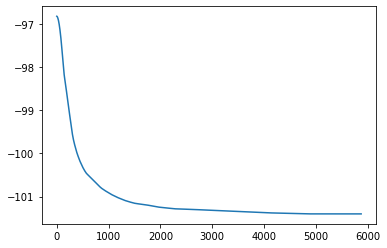

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5405349350854882
Finished after 11395 iterations


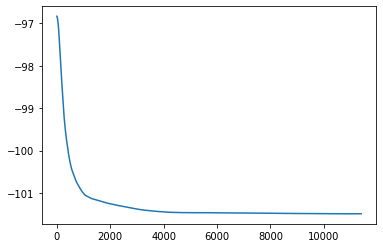

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


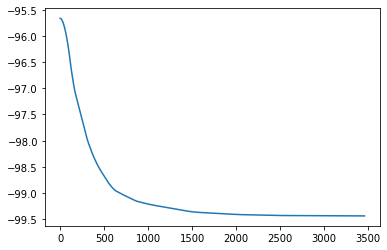

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.5410987498824118
Finished after 12015 iterations


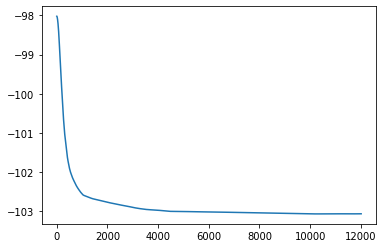

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5399332496674758
Finished after 8050 iterations


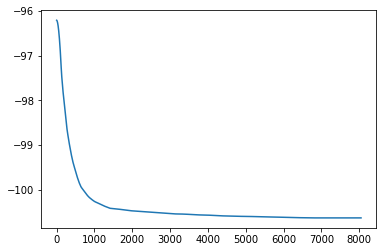

integral = tensor([[1.]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.539551426990418
Finished after 5875 iterations


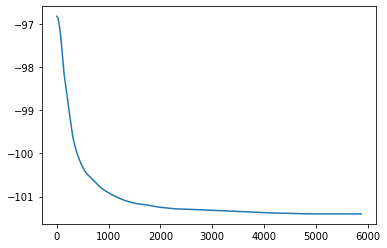

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5405349350854882
Finished after 12145 iterations


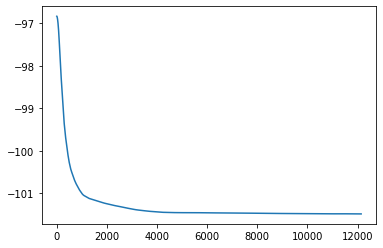

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


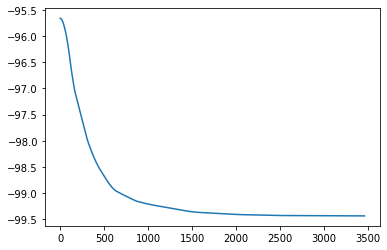

integral = tensor([[1.]])
sigma = 1, lambda = 1.2742749857031322e-06
 norm of the constraint : 1.5410987498824118
Finished after 12020 iterations


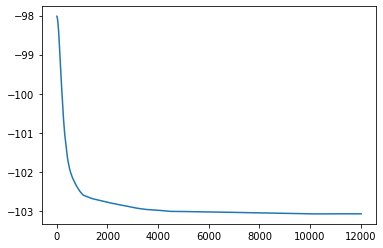

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5399332496674758
Finished after 8055 iterations


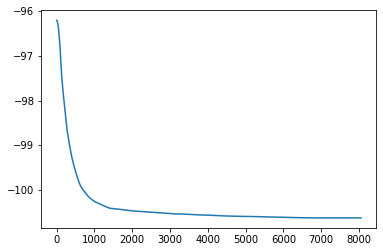

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.539551426990418
Finished after 5880 iterations


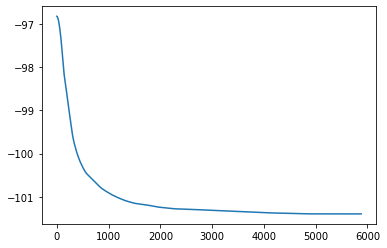

integral = tensor([[1.]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5405349350854882
Finished after 12155 iterations


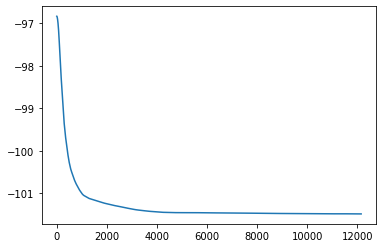

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5380352381647036
Finished after 3460 iterations


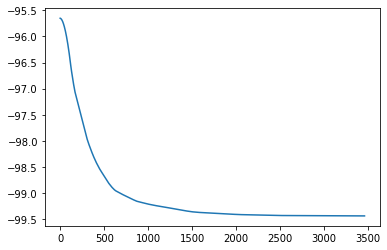

integral = tensor([[1.0000]])
sigma = 1, lambda = 3.359818286283781e-06
 norm of the constraint : 1.5410987498824118
Finished after 12028 iterations


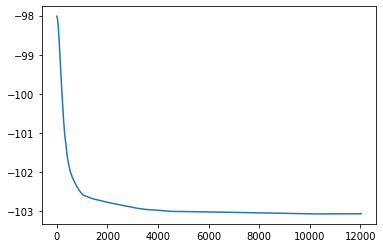

integral = tensor([[1.]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5399332496674758
Finished after 8070 iterations


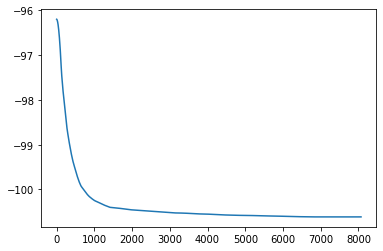

integral = tensor([[1.]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.539551426990418
Finished after 5890 iterations


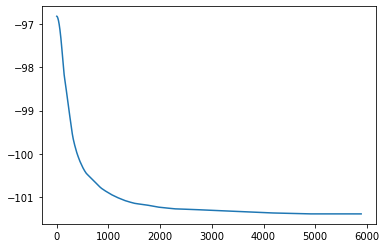

integral = tensor([[1.0000]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5405349350854882
Finished after 12180 iterations


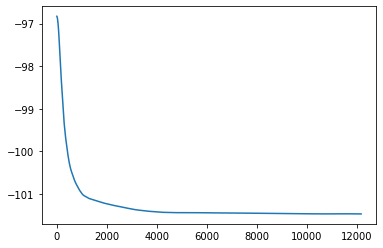

integral = tensor([[1.0000]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5380352381647036
Finished after 3464 iterations


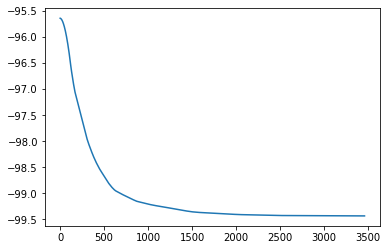

integral = tensor([[1.]])
sigma = 1, lambda = 8.858667904100832e-06
 norm of the constraint : 1.5410987498824118
Finished after 11096 iterations


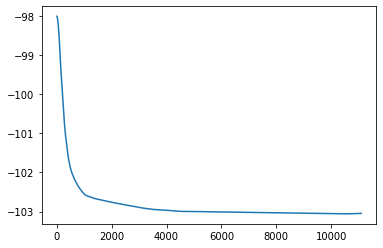

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5399332496674758
Finished after 8110 iterations


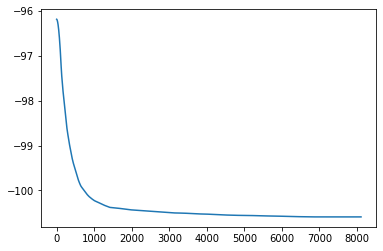

integral = tensor([[1.]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.539551426990418
Finished after 5915 iterations


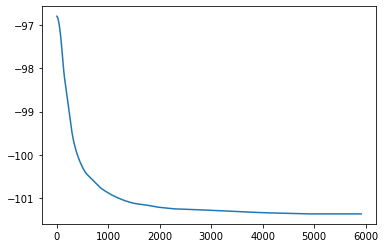

integral = tensor([[1.]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5405349350854882
Finished after 12250 iterations


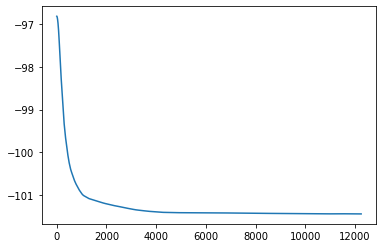

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5380352381647036
Finished after 3470 iterations


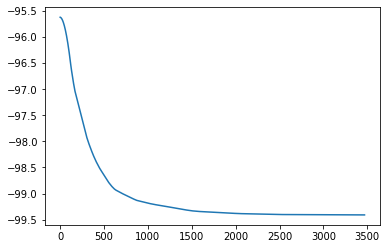

integral = tensor([[1.0000]])
sigma = 1, lambda = 2.3357214690901213e-05
 norm of the constraint : 1.5410987498824118
Finished after 12105 iterations


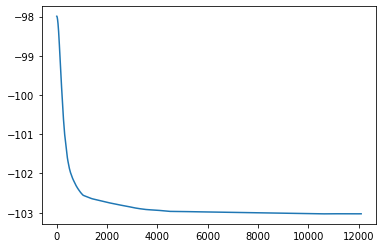

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5399332496674758
Finished after 8220 iterations


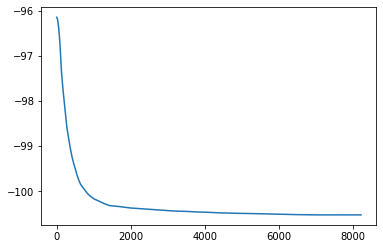

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.539551426990418
Finished after 5990 iterations


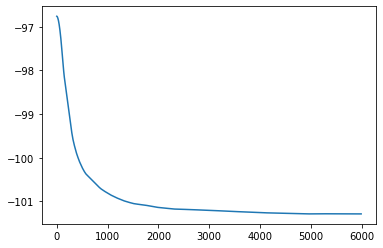

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5405349350854882
Finished after 6020 iterations


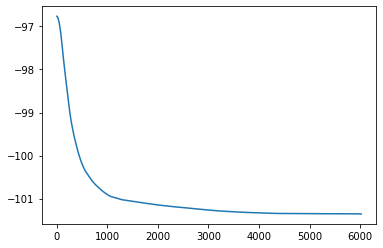

integral = tensor([[1.0000]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5380352381647036
Finished after 3492 iterations


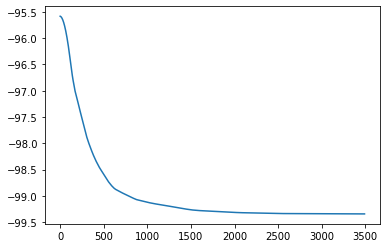

integral = tensor([[1.]])
sigma = 1, lambda = 6.158482110660255e-05
 norm of the constraint : 1.5410987498824118
Finished after 12260 iterations


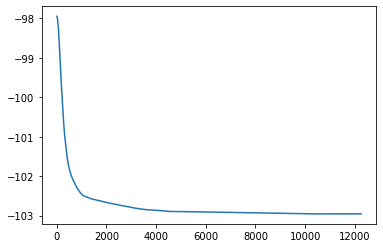

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5399332496674758
Finished after 8510 iterations


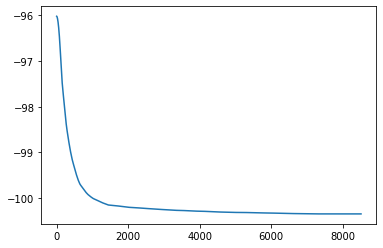

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.539551426990418
Finished after 6210 iterations


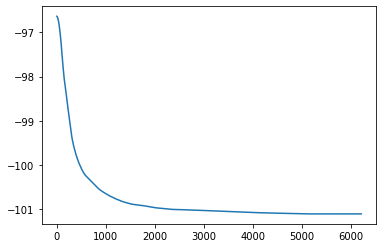

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5405349350854882
Finished after 6030 iterations


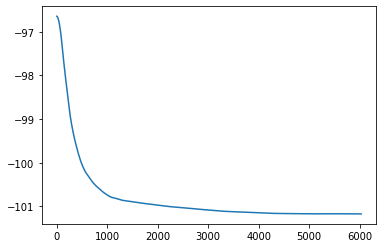

integral = tensor([[1.]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5380352381647036
Finished after 3196 iterations


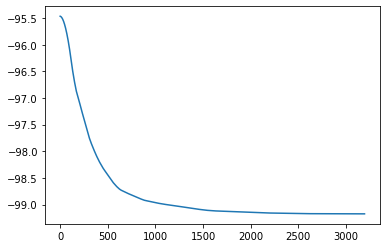

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0001623776739188721
 norm of the constraint : 1.5410987498824118
Finished after 12658 iterations


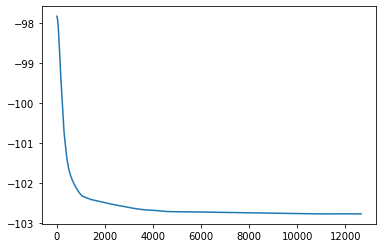

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5399332496674758
Finished after 9230 iterations


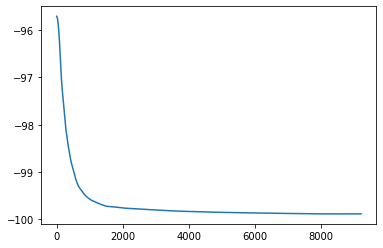

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.539551426990418
Finished after 6910 iterations


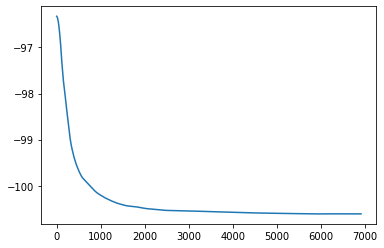

integral = tensor([[1.]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5405349350854882
Finished after 5942 iterations


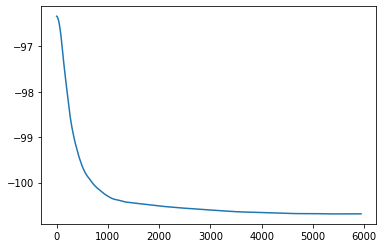

integral = tensor([[1.]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5380352381647036
Finished after 3500 iterations


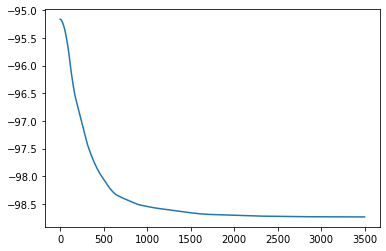

integral = tensor([[1.]])
sigma = 1, lambda = 0.00042813323987193956
 norm of the constraint : 1.5410987498824118
Finished after 13895 iterations


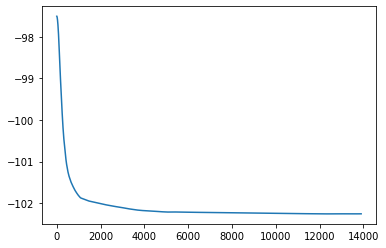

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5399332496674758
Finished after 8185 iterations


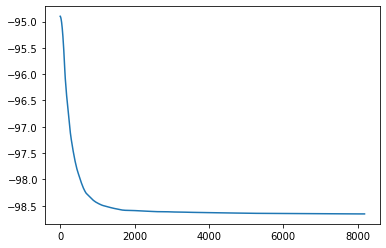

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.539551426990418
Finished after 3740 iterations


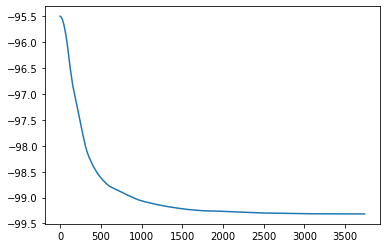

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5405349350854882
Finished after 7985 iterations


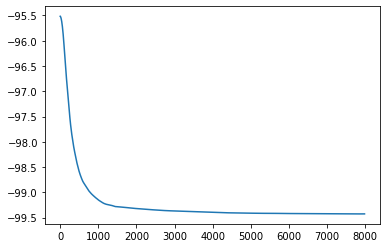

integral = tensor([[1.]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5380352381647036
Finished after 5635 iterations


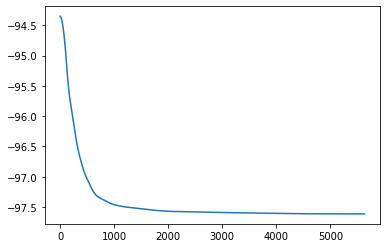

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0011288378916846883
 norm of the constraint : 1.5410987498824118
Finished after 7500 iterations


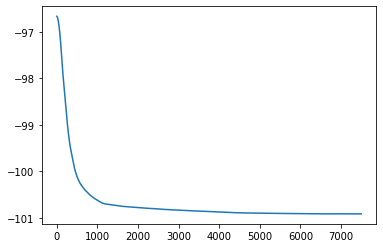

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5399332496674758
Finished after 7535 iterations


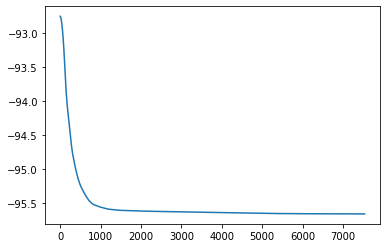

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.539551426990418
Finished after 10510 iterations


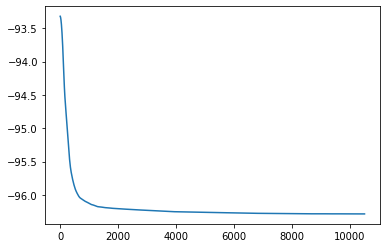

integral = tensor([[1.]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5405349350854882
Finished after 9285 iterations


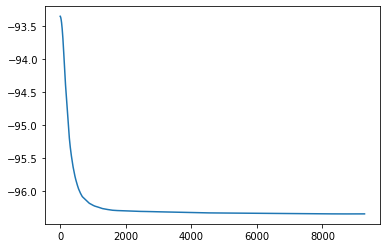

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5380352381647036
Finished after 20085 iterations


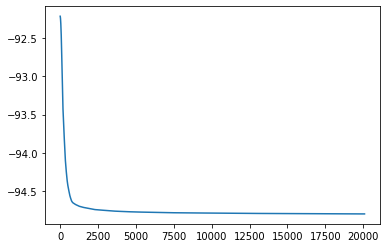

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.002976351441631313
 norm of the constraint : 1.5410987498824118
Finished after 3030 iterations


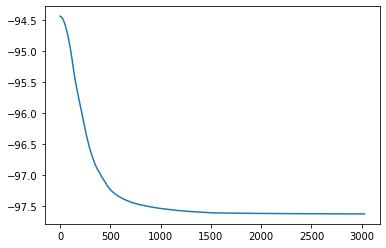

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5399332496674758
Finished after 13390 iterations


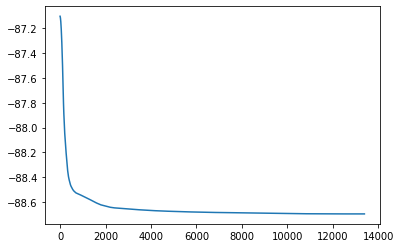

integral = tensor([[1.]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.539551426990418
Finished after 9785 iterations


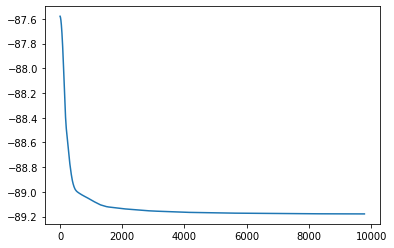

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5405349350854882
Finished after 18555 iterations


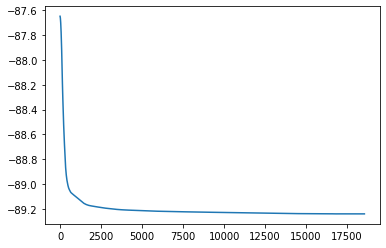

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5380352381647036
Finished after 12772 iterations


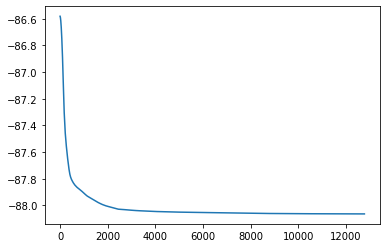

integral = tensor([[1.]])
sigma = 1, lambda = 0.007847599703514606
 norm of the constraint : 1.5410987498824118
Finished after 19965 iterations


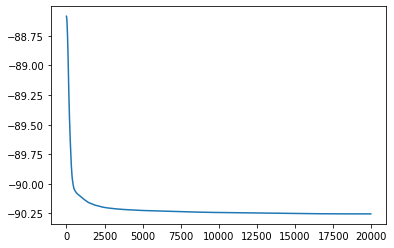

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5399332496674758


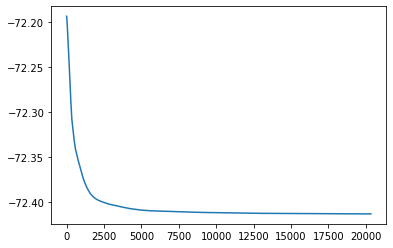

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.539551426990418


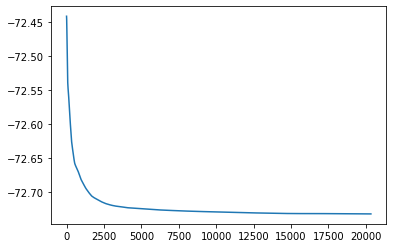

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5405349350854882


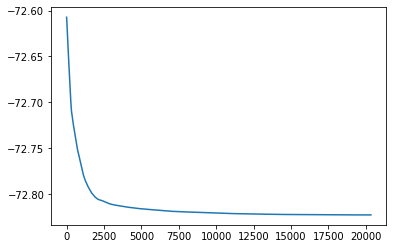

integral = tensor([[1.]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5380352381647036


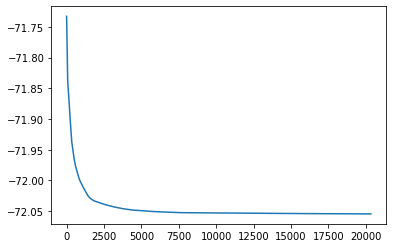

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.0206913808111479
 norm of the constraint : 1.5410987498824118


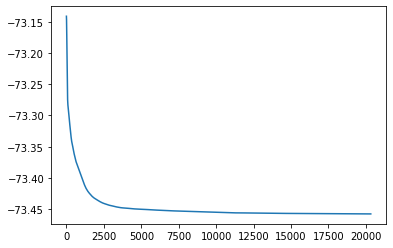

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5399332496674758
Finished after 4155 iterations


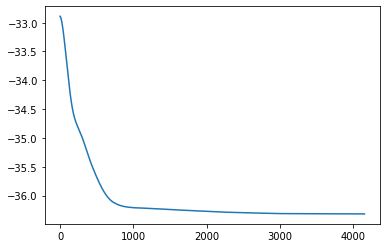

integral = tensor([[1.]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.539551426990418
Finished after 3970 iterations


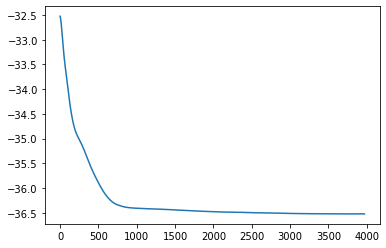

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5405349350854882
Finished after 3890 iterations


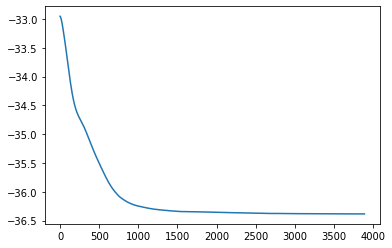

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5380352381647036
Finished after 3990 iterations


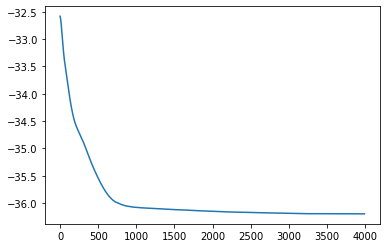

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.05455594781168514
 norm of the constraint : 1.5410987498824118
Finished after 4290 iterations


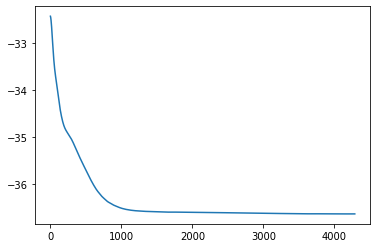

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5399332496674758
Finished after 1410 iterations


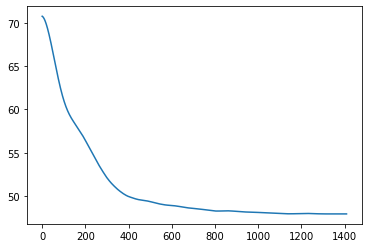

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.539551426990418
Finished after 1430 iterations


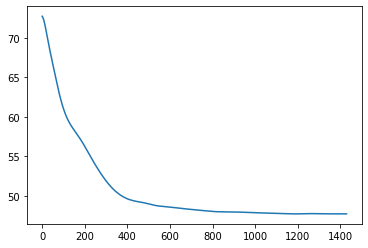

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5405349350854882
Finished after 1755 iterations


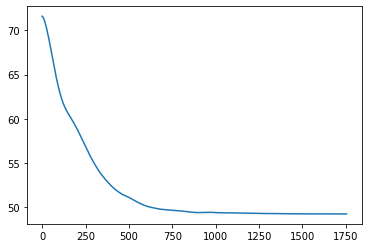

integral = tensor([[1.]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5380352381647036
Finished after 1460 iterations


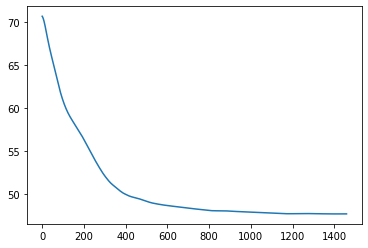

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.143844988828766
 norm of the constraint : 1.5410987498824118
Finished after 1665 iterations


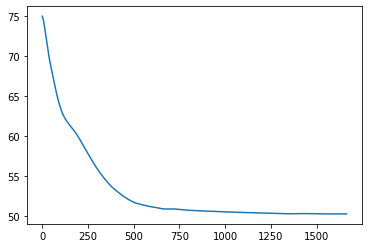

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5399332496674758
Finished after 890 iterations


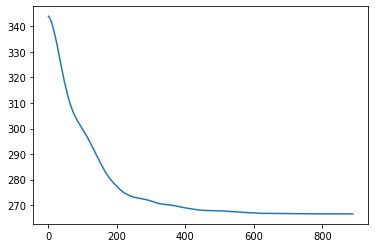

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.539551426990418
Finished after 880 iterations


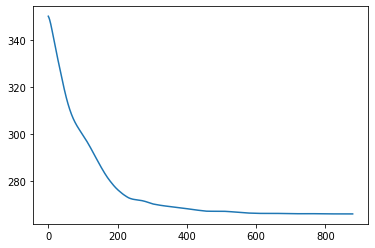

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5405349350854882
Finished after 865 iterations


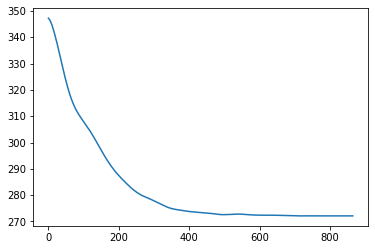

integral = tensor([[1.]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5380352381647036
Finished after 766 iterations


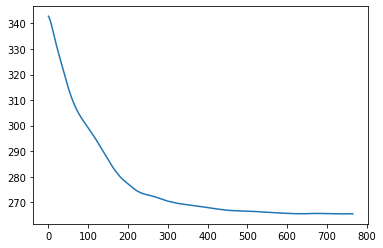

integral = tensor([[1.0000]])
sigma = 1, lambda = 0.3792690190732246
 norm of the constraint : 1.5410987498824118
Finished after 1225 iterations


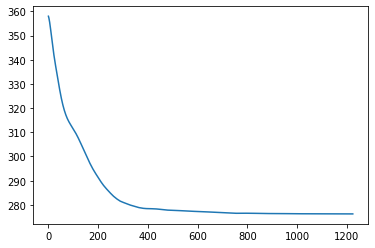

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5399332496674758
Finished after 515 iterations


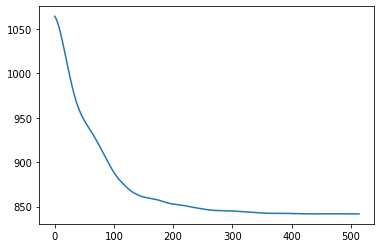

integral = tensor([[1.]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.539551426990418
Finished after 449 iterations


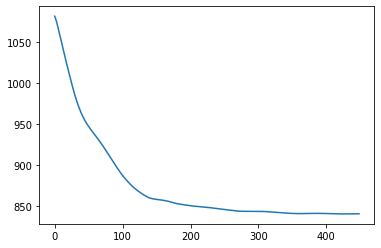

integral = tensor([[1.]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5405349350854882
Finished after 505 iterations


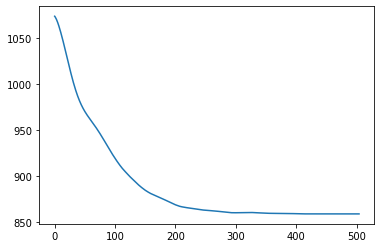

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5380352381647036
Finished after 445 iterations


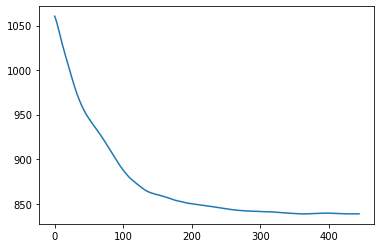

integral = tensor([[1.0000]])
sigma = 1, lambda = 1.0
 norm of the constraint : 1.5410987498824118
Finished after 715 iterations


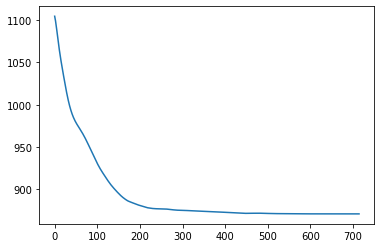

integral = tensor([[1.0000]])
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.7215834750836223
Finished after 8185 iterations


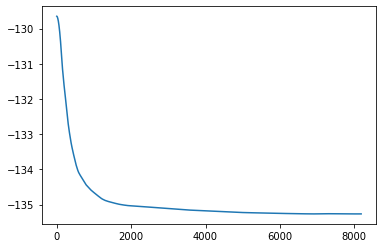

In [14]:

parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.NadarayaWatsonEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/nw_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

{'Niter': 'auto', 'eta_base': 5, 'la': 4.832930238571752e-07, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 4.832930238571752e-07
 norm of the constraint : 1.7215834750836223
Finished after 8185 iterations


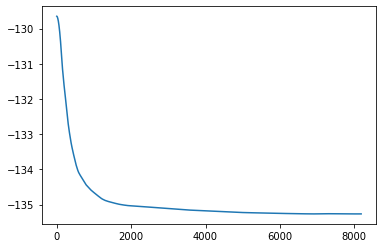

In [12]:
version = 1
filename = f'models/nw_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.NadarayaWatsonEstimator(**params_best)
model.fit(data_set)

integral = tensor([[1.0000]])
integral = tensor([[1.0000]])


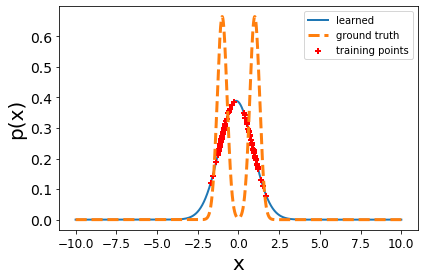

In [13]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# GLMS 

In [ ]:
version = find_last_version(path = 'models/glm_model_1D',extension = 'pickle')

print(f'last version number : {version}')

In [ ]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.ExpoEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [ ]:
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.ExpoEstimator(**params_best)
model.fit(data_set)

In [ ]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()